Setup

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn import linear_model
#from plotly import tools
import numpy.random as r
#import plotly.plotly as py
#import plotly.graph_obj as go
#from keras import backend as K


from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense


#from keras.layers import Dense
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv("qudditch_training.csv")
df.drop(["id","player_id","weight","foul_type_id","game_move_id","penalty_id","player_code","move_speciality","snitchnip",
         "checking","dopplebeater_defence","hawkshead_attacking_formation","no_hands_tackle","power_play","spiral_dive",
         "starfish_and_stick","twirl","wronski_feint","zig-zag","bludger_backbeat","chelmondiston_charge",
         "dionysus_dive","double_eight_loop","finbourgh_flick","parkins_pincer","plumpton_pass","porskoff_ploy",
         "transylvanian_tackle","woollongong_shimmy"],axis=1,inplace=True)
df = (df[~pd.isnull(df).any(axis=1)])

In [3]:
Xlabels=['age', 'game_duration', 'num_game_moves',
       'num_game_losses', 'num_practice_sessions', 'num_games_satout',
       'num_games_injured', 'num_games_notpartof',
       'num_games_won', 'stooging', 'body_blow', 'sloth_grip_roll',
       'reverse_pass', 'change', 'snitch_caught',
       'gryffindor','hufflepuff','ravenclaw','slytherin','female','male',
       'beater','chaser','seeker']

In [4]:
#print(df.columns)
data = df.values
X1 = data[0:101267] # This leaves 101265 entries.

Y = data[:,-1]

#Y1 = Y1=='YES'
for i in range(len(Y)):
    if Y[i]=="NO":
        Y[i]=0.0
    elif Y[i]=="YES":
        Y[i]=1.0
        
Y=Y.astype('float')

#Y = Y.reshape((Y.shape[0],1))

gryffindor = np.zeros((X1.shape[0],1),dtype='float')
hufflepuff = np.zeros((X1.shape[0],1),dtype='float')
ravenclaw = np.zeros((X1.shape[0],1),dtype='float')
slytherin = np.zeros((X1.shape[0],1),dtype='float')

female = np.zeros((X1.shape[0],1))
male = np.zeros((X1.shape[0],1))

beater = np.zeros((X1.shape[0],1))
chaser = np.zeros((X1.shape[0],1))
seeker = np.zeros((X1.shape[0],1))

#print(X1[0])

for row in range(len(X1)):
    if X1[row][0]=="Gryffindor":
        gryffindor[row]=1.0
    elif X1[row][0]=="Hufflepuff":
        hufflepuff[row]=1.0
    elif X1[row][0]=="Ravenclaw":
        ravenclaw[row]=1.0
    elif X1[row][0]=="Slytherin":
        slytherin[row]=1.0
        
    if X1[row][1]=="Female":
        female[row]=1.0
    elif X1[row][1]=="Male":
        male[row]=1.0
        
#    if X1[row][7]=="?":
#        X1[row][7]=0;
#    else:
#        X1[row][7]=float(X1[row][7])

    if X1[row][10]=="Beater":
        beater[row]=1.0
    elif X1[row][10]=="Chaser":
        chaser[row]=1.0
    elif X1[row][10]=="Seeker":
        seeker[row]=1.0
        
    if X1[row][12]=="Norm":
        X1[row][12]=1.0
    elif X1[row][12]==">7":
        X1[row][12]=2.0
    elif X1[row][12]==">8":
        X1[row][12]=3.0
    elif X1[row][12]=="None":
        X1[row][12]=0.0
    
    if X1[row][13]=="No":
        X1[row][13]=0.0
    elif X1[row][13]=="Down":
        X1[row][13]=1.0
    elif X1[row][13]=="Steady":
        X1[row][13]=2.0
    elif X1[row][13]=="Up":
        X1[row][13]=3.0
        
    if X1[row][14]=="No":
        X1[row][14]=0.0
    elif X1[row][14]=="Down":
        X1[row][14]=1.0
    elif X1[row][14]=="Steady":
        X1[row][14]=2.0
    elif X1[row][14]=="Up":
        X1[row][14]=3.0
        
    if X1[row][15]=="No":
        X1[row][15]=0.0
    elif X1[row][15]=="Down":
        X1[row][15]=1.0
    elif X1[row][15]=="Steady":
        X1[row][15]=2.0
    elif X1[row][15]=="Up":
        X1[row][15]=3.0
        
    if X1[row][-2]=="No":
        X1[row][-2]=0.0
    elif X1[row][-2]=="Yes":
        X1[row][-2]=1.0

    if X1[row][-3]=="No":
        X1[row][-3]=0.0
    elif X1[row][-3]=="Ch":
        X1[row][-3]=1.0
        
print(df.columns[18])
#X1[:,-2] = X1[:,-2]=="Yes"
#X1[:,-3] = X1[:,-3]=="Ch"

#print(X1[0])

X1 = np.hstack((X1,gryffindor,hufflepuff,ravenclaw,slytherin,female,male,beater,chaser,seeker))
#X1: [
#0'house', 
#1'gender', 
#2'age', 
#3'game_duration', 
#4'num_game_moves',
#5'num_game_losses',
#6'num_practice_sessions',
#7'num_games_satout',
#8'num_games_injured',
#9'num_games_notpartof',
#10'player_type',
#11'num_games_won',
#12'stooging',
#13'body_blow',
#14'sloth_grip_roll',
#15'reverse_pass',
#16'change',
#17'snitch_caught',
#    'quidditch_league_player'?
#18'gryffindor',
#19'hufflepuff',
#20'ravenclaw',
#21'slytherin',
#22'female',
#23'male',
#24'beater',
#25'chaser',
#26'seeker']
X = np.delete(X1,[0,1,10,18],1)

Xlables=['age', 'game_duration', 'num_game_moves',
       'num_game_losses', 'num_practice_sessions', 'num_games_satout',
       'num_games_injured', 'num_games_notpartof',
       'num_games_won', 'stooging', 'body_blow', 'sloth_grip_roll',
       'reverse_pass', 'change', 'snitch_caught',
       'gryffindor','hufflepuff','ravenclaw','slytherin','female','male',
       'beater','chaser','seeker']

row_num = 1
column_num = 1
for row in X:
    for column in row:
        if type(column) != float:
            #print("DING!")
            continue
            #print("row=" + str(row_num) + "," + " column=" + str(column_num) + " data= ")
            #print(str(column) + " not float but ")
            #column = float(column)
            #print("now the val is of type: " + str(type(column)) + "\n")
        column_num += 1
    row_num += 1

X=X.astype('float')
    
#print((X[0:20]))
#print(Y[0:20])


#print(X[0:20,-6:-2])

#print(X[0:20,-2:])

quidditch_league_player


In [5]:
X_scale = preprocessing.scale(X)

In [6]:
Xp=preprocessing.PolynomialFeatures(degree=2)

In [7]:
trainX,testX,trainY,testY=train_test_split(X_scale,Y,test_size=0.3)

In [8]:

trainXpoly=Xp.fit_transform(trainX)
testXpoly=Xp.fit_transform(testX)
print(len(trainX[0]))
print(len(trainXpoly[0]))

24
325


Unsupervised Analysis

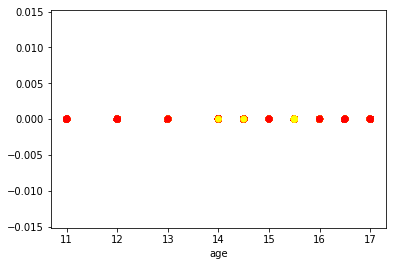

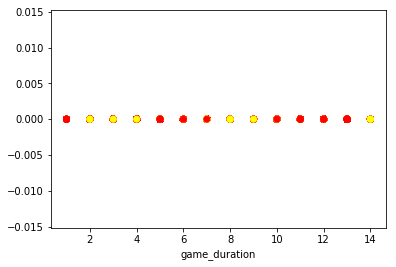

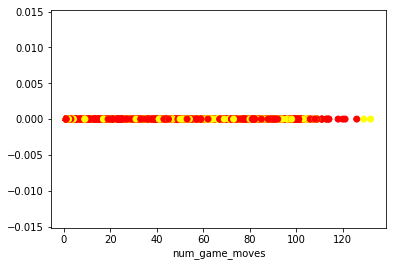

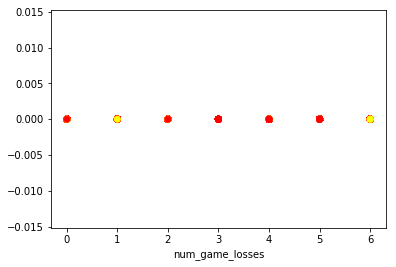

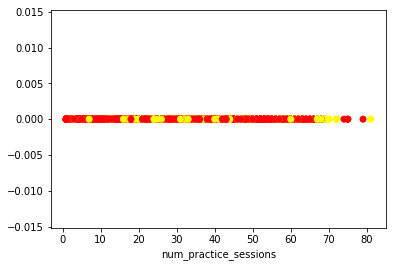

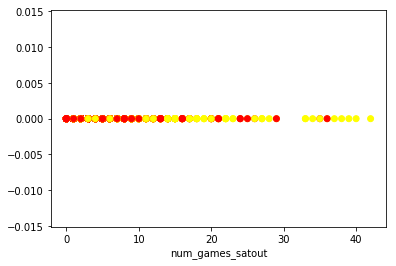

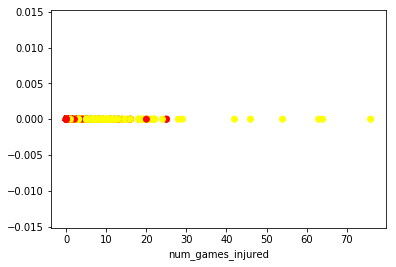

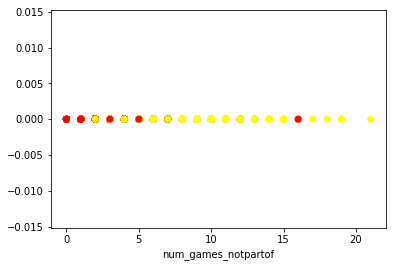

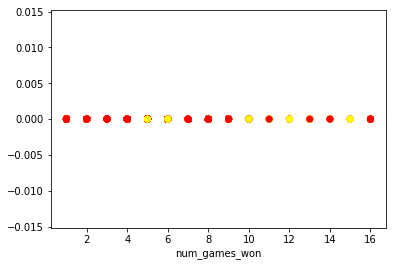

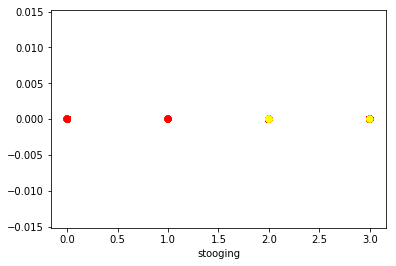

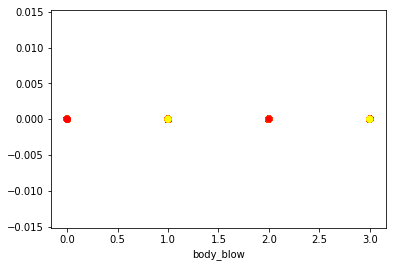

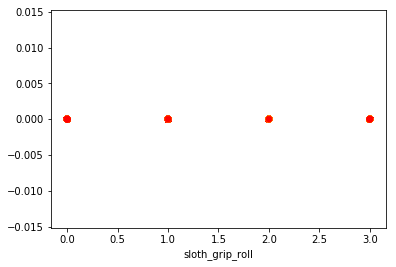

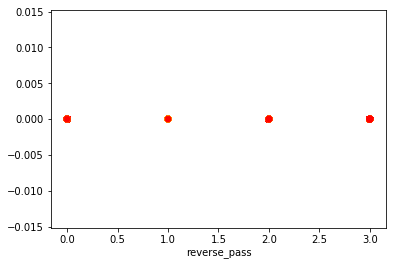

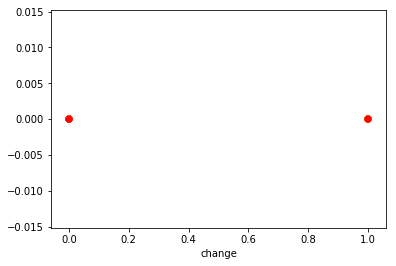

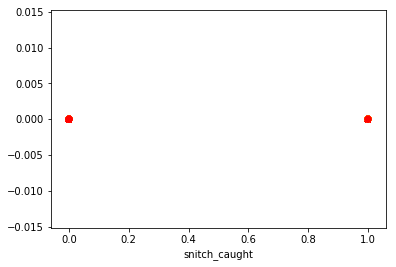

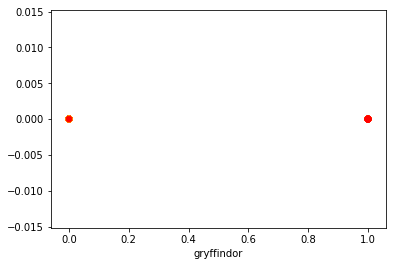

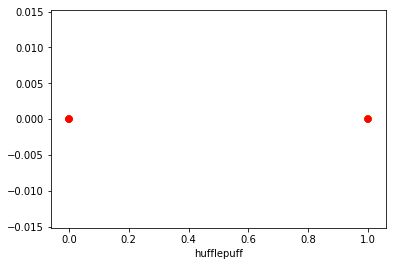

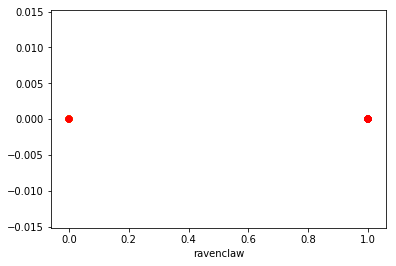

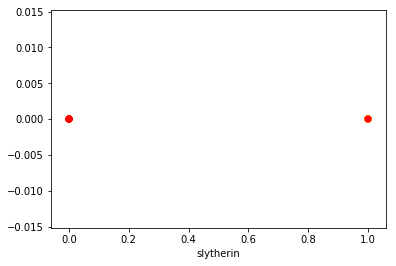

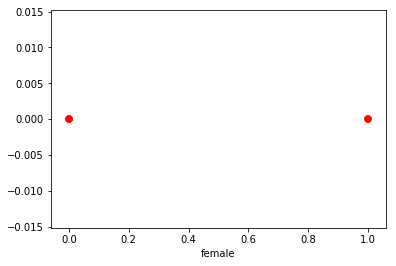

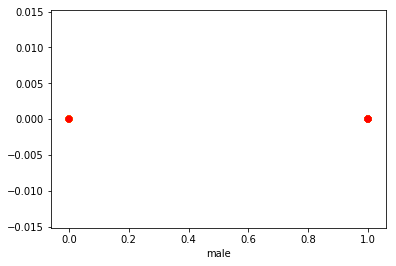

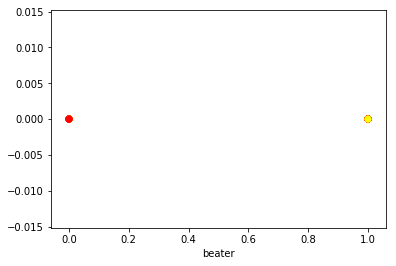

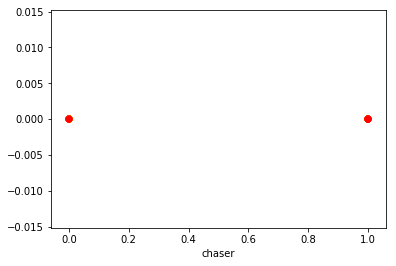

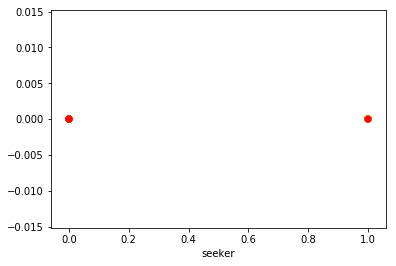

In [10]:
# Unsupervised Analysis
# Plot every x parameter with y

for i in range(24):
    #fig=plt.subplot(24,1,i+1)
    plt.xlabel(Xlabels[i])
    plt.scatter(X[:,i],len(X)*[0],c=Y,cmap="autumn")
    plt.show()

# We gotta change this so that every pair of features are plotted in subplots.

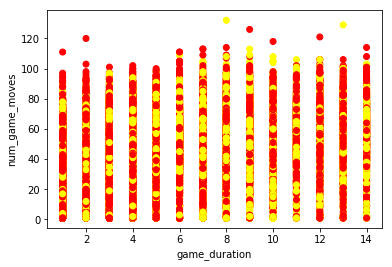

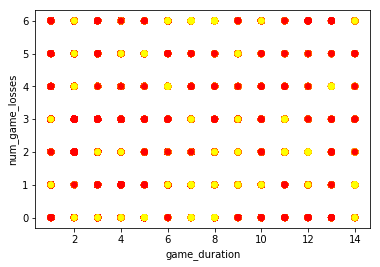

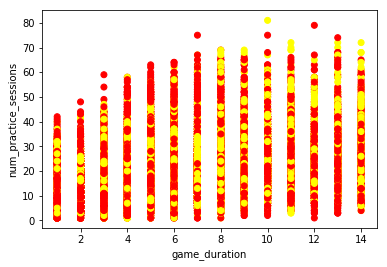

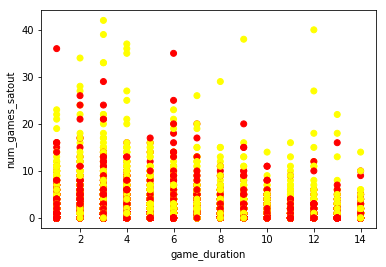

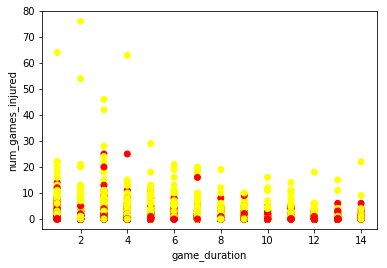

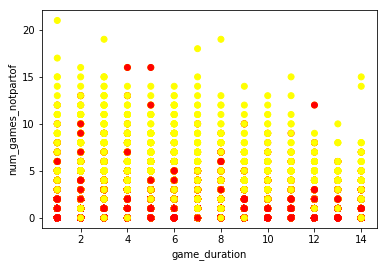

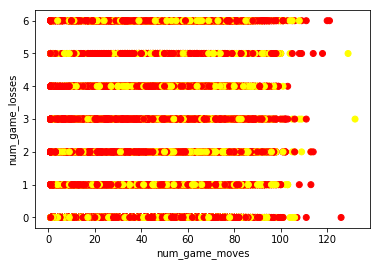

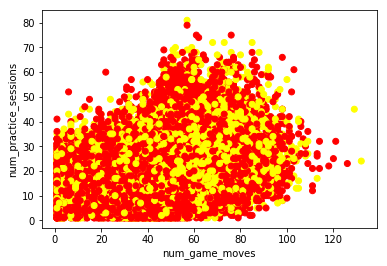

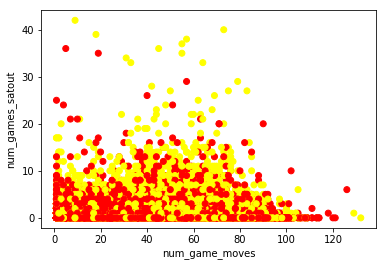

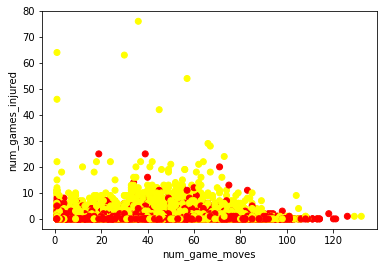

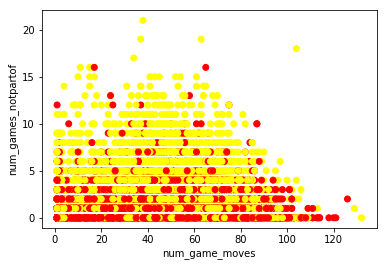

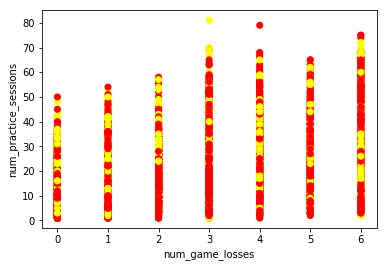

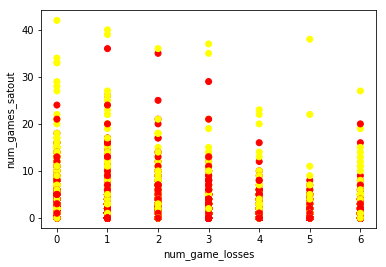

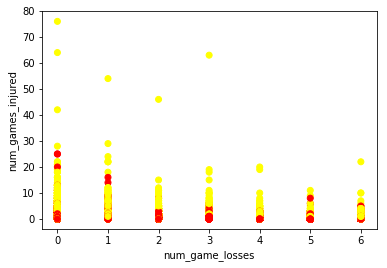

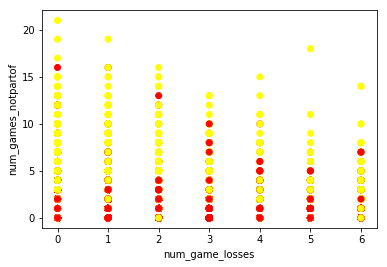

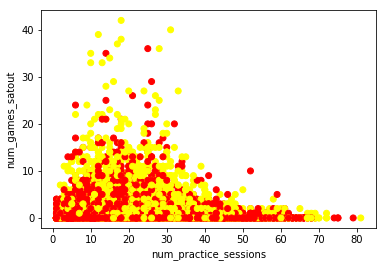

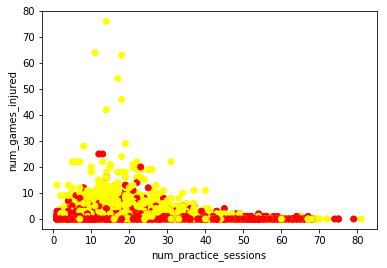

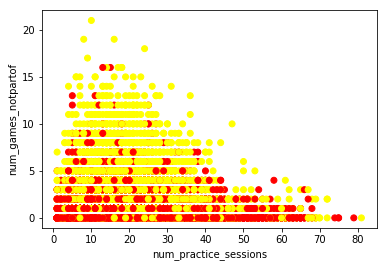

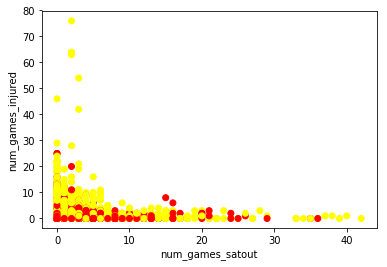

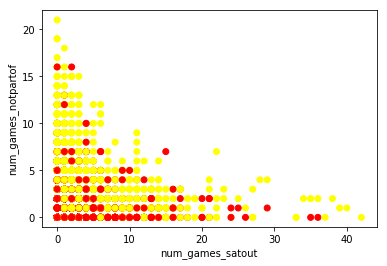

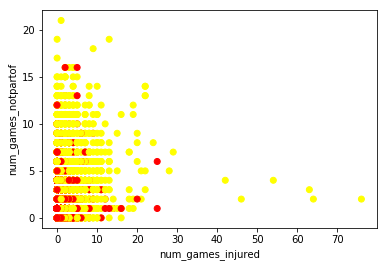

In [11]:
# Plot every pair of x parameters with y

# We gotta change this so that every pair of features are plotted in subplots.
[1,2,3,4,5,6,7]
for i in range(7):
    for j in range(i+1,7):
        #fig = plt.subplot(276,1,i+1)
        plt.xlabel(Xlabels[i+1])
        plt.ylabel(Xlabels[j+1])
        plt.scatter(X[:,i+1],X[:,j+1],c=Y,cmap='autumn')
        plt.show()

Logistic Regression

In [12]:
Y

array([0., 1., 0., ..., 0., 0., 0.])

In [13]:
# Variations:
# Regularization (use L1 and L2)
# Polynomial transformation
# c values

acc_train_logreg = []
acc_test_logreg = []
c_logreg = []
def logreg_model(c , X_train, Y_train, X_test, Y_test,reg=None, max_iter=200):
    if reg=="LASSO" or reg=="Lasso" or reg=="lasso" or reg=="l2" or reg==None:
        logreg = linear_model.LogisticRegression(C=c,penalty='l2', warm_start=True, solver='saga')
    elif reg=="Ridge" or reg=="ridge" or reg=="l1":
        logreg = linear_model.LogisticRegression(C=c,penalty='l1', warm_start=True, solver='saga')
    
    logreg.fit(X_train, Y_train)
    Yhat_train = logreg.predict(X_train)
    
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg.predict(X_test)
    
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    tpTest=0
    tnTest=0
    fpTest=0
    fnTest=0
    
    for i in range(len(Y_test)):
        if Y_test[i]==1:
            if Yhat_test[i]==1:
                tpTest+=1
            else:
                fnTest+=1
        else:
            if Yhat_test[i]==0:
                tnTest+=1
            else:
                fpTest+=1
                
    print("True+: " + str(tpTest) + ", True-: " + str(tnTest) + ", False+: " + str(fpTest) + "False-: " + str(fnTest))

    # Appending value of c for graphing purposes\n",
    c_logreg.append(c)
    #print(logreg.coef_)
    #print(logreg.intercept_)

In [14]:
clist = [0.001,0.01,0.1,1,10,100]

In [15]:
print(type(trainY[0]))
for c in clist:
    logreg_model(c,trainX,trainY,testX,testY,'LASSO')

<class 'numpy.float64'>
Accuracy on training data = 0.615806
Accuracy on test data = 0.623864
True+: 5640, True-: 13313, False+: 2997False-: 8430
Accuracy on training data = 0.616455
Accuracy on test data = 0.624161
True+: 5739, True-: 13223, False+: 3087False-: 8331


C:\Users\alexb\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.616455
Accuracy on test data = 0.624589
True+: 5756, True-: 13219, False+: 3091False-: 8314


C:\Users\alexb\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.616398
Accuracy on test data = 0.624621
True+: 5757, True-: 13219, False+: 3091False-: 8313


C:\Users\alexb\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.616398
Accuracy on test data = 0.624621
True+: 5757, True-: 13219, False+: 3091False-: 8313
Accuracy on training data = 0.616398
Accuracy on test data = 0.624621
True+: 5757, True-: 13219, False+: 3091False-: 8313


C:\Users\alexb\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [16]:
print 

<function print>

In [17]:
for c in clist:
    logreg_model(c,trainX,trainY,testX,testY,'Ridge')

Accuracy on training data = 0.613111
Accuracy on test data = 0.617544
True+: 5033, True-: 13728, False+: 2582False-: 9037
Accuracy on training data = 0.616017
Accuracy on test data = 0.623897
True+: 5600, True-: 13354, False+: 2956False-: 8470
Accuracy on training data = 0.616328
Accuracy on test data = 0.624161
True+: 5735, True-: 13227, False+: 3083False-: 8335
Accuracy on training data = 0.616412
Accuracy on test data = 0.624589
True+: 5756, True-: 13219, False+: 3091False-: 8314


C:\Users\alexb\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.616398
Accuracy on test data = 0.624621
True+: 5757, True-: 13219, False+: 3091False-: 8313
Accuracy on training data = 0.616398
Accuracy on test data = 0.624621
True+: 5757, True-: 13219, False+: 3091False-: 8313


C:\Users\alexb\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [18]:
#Use different feature pairs
for c in clist:
    logreg_model(c,trainXpoly,trainY,testXpoly,testY,'LASSO')


C:\Users\alexb\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.582118
Accuracy on test data = 0.583575
True+: 2139, True-: 15590, False+: 720False-: 11931


C:\Users\alexb\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.582174
Accuracy on test data = 0.583805
True+: 2146, True-: 15590, False+: 720False-: 11924


C:\Users\alexb\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.582132
Accuracy on test data = 0.583772
True+: 2145, True-: 15590, False+: 720False-: 11925


C:\Users\alexb\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.582118
Accuracy on test data = 0.583871
True+: 2148, True-: 15590, False+: 720False-: 11922


C:\Users\alexb\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.582188
Accuracy on test data = 0.583838
True+: 2147, True-: 15590, False+: 720False-: 11923
Accuracy on training data = 0.582104
Accuracy on test data = 0.583904
True+: 2149, True-: 15590, False+: 720False-: 11921


C:\Users\alexb\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [19]:
for c in clist:
    logreg_model(c,trainXpoly,trainY,testXpoly,testY,'Ridge')

C:\Users\alexb\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.586646
Accuracy on test data = 0.588348
True+: 2450, True-: 15424, False+: 886False-: 11620


C:\Users\alexb\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.589707
Accuracy on test data = 0.590520
True+: 2663, True-: 15277, False+: 1033False-: 11407


KeyboardInterrupt: 

Support Vector Machines

In [ ]:
# Variations
# c value
# kernel
# polynomial transformation

acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []

acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []

acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []

In [ ]:
#use svm_kernel parameter to choose svm model type. 3 kernel options: "linear"[default], "rbf", "poly"

def svm_model(c, X_train, Y_train, X_test, Y_test, svm_kernel = "linear"):
    # TODO - Create an object of svm.SVC(probability = False, kernel = 'linear', C = c) - 5 points
    svc = svm.SVC(probability = False, kernel = svm_kernel, C = c)
    print("kernel: "+str(svm_kernel))
    print("c:{0:f}".format(c))
    
    #if svm_kernel=="poly": # Fill in the values for 
    #X_train=X_train[0:12500]
    #Y_train=Y_train[0:12500]
    #X_test=X_test[0:5300]
    #Y_test=Y_test[0:5300]
    
    # TODO - Fit the classifier on the training set - 5 points
    svc.fit(X_train, Y_train)
    
    # TODO - Find the prediction and accuracy on the training set - 5 points
    Yhat_svc_train = svc.predict(X_train)
    acc_train = np.mean(Yhat_svc_train == Y_train)
    
    # Adding testing accuracy to acc_train_svm
    if svm_kernel=="linear":
        acc_train_svm_linear.append(acc_train)
    elif svm_kernel=="rbf":
        acc_train_svm_rbf.append(acc_train)
    elif svm_kernel=="poly":
        acc_train_svm_poly.append(acc_train)
        
    print('\tTrain Accuracy = '+str(acc_train))
    
    # TODO - Find the prediction and accuracy on the test set - 5 points
    Yhat_svc_test = svc.predict(X_test)
    acc_test = np.mean(Yhat_svc_test == Y_test)
    
    # Adding testing accuracy to acc_test_svm
    if svm_kernel=="linear":
        acc_test_svm_linear.append(acc_test)
    elif svm_kernel=="rbf":
        acc_test_svm_rbf.append(acc_test)
    elif svm_kernel=="poly":
        acc_test_svm_poly.append(acc_train)
        
    print('\tTest Accuracy = '+str(acc_test))
    
    # Appending value of c for graphing purposes
    if svm_kernel=="linear":
        c_svm_linear.append(c)
    elif svm_kernel=="rbf":
        c_svm_rbf.append(c)
    elif svm_kernel=="poly":
        c_svm_poly.append(c)
        
    tpTest=0
    tnTest=0
    fpTest=0
    fnTest=0
    
    for i in range(len(Y_test)):
        if Y_test[i]==1:
            if Yhat_svc_test[i]==1:
                tpTest+=1
            else:
                fnTest+=1
        else:
            if Yhat_svc_test[i]==0:
                tnTest+=1
            else:
                fpTest+=1
                
    print("True+: " + str(tpTest) + ", True-: " + str(tnTest) + ", False+: " + str(fpTest) + ", False-: " + str(fnTest))


In [ ]:
print(acc_train_svm_linear)
print(acc_test_svm_linear)
print(c_svm_linear)

In [ ]:
clist=[0.001,0.01,0.1,1,10]

In [ ]:

for c in clist:
    svm_model(c,trainX,trainY,testX,testY,svm_kernel="linear");
    


In [ ]:
for c in clist:
    svm_model(c,trainX,trainY,testX,testY,svm_kernel="rbf");

In [ ]:
for c in clist:
    svm_model(c,trainXpoly,trainY,testXpoly,testY,svm_kernel="rbf");

In [ ]:
for c in clist:
    svm_model(c,trainX,trainY,testX,testY,svm_kernel="poly");

In [ ]:
for c in clist:
    svm_model(c,trainXpoly,trainY,testXpoly,testY,svm_kernel="poly");

In [ ]:
acc_train_svm_rbf = [0.54256,0.54256,0.5904,0.72312,0.8512,0.93952]
acc_test_svm_rbf = [0.535283018868,0.535283018868,0.572830188679,0.592830188679,0.576603773585,0.554716981132]
c_svm_rbf = [0.001,0.01,0.1,1.0,10.0,100.0]

In [ ]:
plt.plot(c_svm_rbf, acc_train_svm_rbf, 'ro-') 
plt.plot(c_svm_rbf, acc_test_svm_rbf,'bo-') 
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [ ]:
for c in clist:
    svm_model(c,trainX,trainY,testX,testY,svm_kernel="poly") #Reduced inputs

In [ ]:
for c in clist:
    svm_model(c,trainXpoly,trainY,testXpoly,testY,svm_kernel="rbf")

In [ ]:
acc_train_svm_poly = [0.546,0.5628,0.6072,0.7416,0.8884,0.976]
acc_test_svm_poly = [0.5248,0.534,0.5356,0.538,0.5292,0.5256]
c_svm_poly = [0.001,0.01,0.1,1.0,10.0,100.0]

In [ ]:
plt.plot(c_svm_poly, acc_train_svm_poly, 'ro-') 
plt.plot(c_svm_poly, acc_test_svm_poly,'bo-') 
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

Neural Networks

In [ ]:
# Variations:
# hidden layers (use 1,2 and 3)
# hidden layer nodes (use 10,20 and 5)
# activation function (use sigmoid, ReLU, tanh)

def f(z):
    return 1 / (1 + np.exp(-z))


def f_deriv(z):
    return f(z) * (1 - f(z))

def f2(z):
    if z>0:
        return z
    else:
        return 0
    
def f2_deriv(z):
    if z>0:
        return 1
    else:
        return 0
    
def f3(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

def f3_deriv(z):
    return 1-(f3(z))^2

In [ ]:
def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1])) #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

def feed_forward(x, W, b, act_func=1):
    a = {1: x}
    z = {}
    for l in range(1, len(W) + 1):
        node_in = a[l]
        #print("\n",W[l],"\n",node_in,"\n",b[l])
        z[l+1] = W[l].dot(node_in) + b[l]
        if act_func==1:
            a[l+1] = f(z[l+1])
        elif act_func == 2:
            a[l+1] = f2(z[l+1])
        elif act_func == 3:
            a[l+1] = f3(z[l+1])
        
    return a, z

def calculate_out_layer_delta(y, a_out, z_out,act_func=1):
    if act_func==1:
        return -(y-a_out) * f_deriv(z_out)
    elif act_func==2:
        return -(y-a_out) * f2_deriv(z_out)
    elif act_func==3:
        return -(y-a_out) * f3_deriv(z_out)


def calculate_hidden_delta(delta_plus_1, w_l, z_l, act_func=1):
    if act_func==1:
        return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)
    elif act_func==2:
        return np.dot(np.transpose(w_l), delta_plus_1) * f2_deriv(z_l)
    elif act_func==3:
        return np.dot(np.transpose(w_l), delta_plus_1) * f3_deriv(z_l)

def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25, act_func=1):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            a, z = feed_forward(X[i, :], W, b,act_func)
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l],act_func)
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l],act_func)
                    #print(type(tri_W))
                    tri_W[l] = tri_W[l] + np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))
                    tri_b[l] = tri_b[l] + delta[l+1]
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] = W[l] + -alpha * (1.0/N * tri_W[l])
            b[l] = b[l] + -alpha * (1.0/N * tri_b[l])
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func


def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

In [ ]:
nn_structure1 = [24, 10, 1]
nn_structure2 = [24, 20, 1]
nn_structure3 = [24, 5, 1]

nn_structure4 = [24, 10, 10, 1]
nn_structure5 = [24, 10, 10, 10, 1]

In [ ]:
trainYvec=trainY.reshape((trainY.shape[0],1))
testYvec=testY.reshape((testY.shape[0],1))

In [ ]:
print(X[0:20])

# v HERE!!!!

In [9]:
def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
    
def f1(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2*((prec*rec)/(prec+rec+K.epsilon()))

In [10]:
np.random.seed(0)
model_1=Sequential()
model_2=Sequential()
model_3=Sequential()
model_4=Sequential()
model_5=Sequential()
model_6=Sequential()
model_7=Sequential()

model_1.add(Dense(len(trainX[0]),input_dim=len(trainX[0]),activation='sigmoid'))
model_1.add(Dense(10,activation='sigmoid'))
model_1.add(Dense(1,activation='sigmoid'))

model_2.add(Dense(len(trainX[0]),input_dim=len(trainX[0]),activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(1,activation='relu'))

model_3.add(Dense(len(trainX[0]),input_dim=len(trainX[0]),activation='tanh'))
model_3.add(Dense(10,activation='tanh'))
model_3.add(Dense(1,activation='tanh'))

model_4.add(Dense(len(trainX[0]),input_dim=len(trainX[0]),activation='tanh'))
model_4.add(Dense(5,activation='sigmoid'))
model_4.add(Dense(1,activation='sigmoid'))

model_5.add(Dense(len(trainX[0]),input_dim=len(trainX[0]),activation='tanh'))
model_5.add(Dense(20,activation='sigmoid'))
model_5.add(Dense(1,activation='sigmoid'))

model_6.add(Dense(len(trainX[0]),input_dim=len(trainX[0]),activation='sigmoid'))
model_6.add(Dense(10,activation='sigmoid'))
model_6.add(Dense(10,activation='sigmoid'))
model_6.add(Dense(1,activation='sigmoid'))

model_7.add(Dense(len(trainX[0]),input_dim=len(trainX[0]),activation='sigmoid'))
model_7.add(Dense(10,activation='sigmoid'))
model_7.add(Dense(10,activation='sigmoid'))
model_7.add(Dense(10,activation='sigmoid'))
model_7.add(Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model_1.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy',f1,recall,precision])
history = model_1.fit(X, Y, epochs=1500, batch_size=4603)
scores = model_1.evaluate(X, Y)
print("\n%s: %.2f%%" % (model_1.metrics_names[1], scores[1]*100))

Instructions for updating:
Use tf.cast instead.
Epoch 1/1500
101266/101266 [==============================] - 2s 21us/step - loss: 0.2637 - acc: 0.4718 - f1: 0.6179 - recall: 0.9293 - precision: 0.4637
Epoch 2/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2492 - acc: 0.5181 - f1: 0.2690 - recall: 0.2413 - precision: 0.4488
Epoch 3/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2473 - acc: 0.5442 - f1: 0.0629 - recall: 0.0335 - precision: 0.6361
Epoch 4/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2458 - acc: 0.5542 - f1: 0.0888 - recall: 0.0479 - precision: 0.7769
Epoch 5/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2444 - acc: 0.5654 - f1: 0.1688 - recall: 0.0989 - precision: 0.7249
Epoch 6/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2428 - acc: 0.5783 - f1: 0.2652 - recall: 0.1691 - precision: 0.6805
Epoch 7/1500
101266/101266 [=====

101266/101266 [==============================] - 0s 1us/step - loss: 0.2275 - acc: 0.6254 - f1: 0.5345 - recall: 0.4679 - precision: 0.6258
Epoch 53/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2274 - acc: 0.6251 - f1: 0.5337 - recall: 0.4664 - precision: 0.6255
Epoch 54/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2275 - acc: 0.6261 - f1: 0.5362 - recall: 0.4706 - precision: 0.6258
Epoch 55/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2273 - acc: 0.6265 - f1: 0.5352 - recall: 0.4673 - precision: 0.6277
Epoch 56/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2274 - acc: 0.6258 - f1: 0.5372 - recall: 0.4728 - precision: 0.6250
Epoch 57/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2273 - acc: 0.6251 - f1: 0.5351 - recall: 0.4696 - precision: 0.6249
Epoch 58/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2273 

101266/101266 [==============================] - 0s 1us/step - loss: 0.2266 - acc: 0.6274 - f1: 0.5431 - recall: 0.4820 - precision: 0.6247
Epoch 105/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2266 - acc: 0.6269 - f1: 0.5427 - recall: 0.4816 - precision: 0.6238
Epoch 106/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2266 - acc: 0.6277 - f1: 0.5418 - recall: 0.4790 - precision: 0.6260
Epoch 107/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2265 - acc: 0.6272 - f1: 0.5426 - recall: 0.4806 - precision: 0.6241
Epoch 108/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2266 - acc: 0.6268 - f1: 0.5429 - recall: 0.4818 - precision: 0.6237
Epoch 109/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2266 - acc: 0.6272 - f1: 0.5429 - recall: 0.4815 - precision: 0.6243
Epoch 110/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6275 - f1: 0.5457 - recall: 0.4866 - precision: 0.6230
Epoch 157/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6275 - f1: 0.5432 - recall: 0.4823 - precision: 0.6249
Epoch 158/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6282 - f1: 0.5466 - recall: 0.4874 - precision: 0.6240
Epoch 159/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6275 - f1: 0.5453 - recall: 0.4860 - precision: 0.6239
Epoch 160/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6276 - f1: 0.5459 - recall: 0.4867 - precision: 0.6234
Epoch 161/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6274 - f1: 0.5454 - recall: 0.4863 - precision: 0.6235
Epoch 162/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6281 - f1: 0.5468 - recall: 0.4882 - precision: 0.6241
Epoch 209/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6289 - f1: 0.5493 - recall: 0.4917 - precision: 0.6240
Epoch 210/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6284 - f1: 0.5465 - recall: 0.4875 - precision: 0.6250
Epoch 211/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6285 - f1: 0.5473 - recall: 0.4882 - precision: 0.6244
Epoch 212/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6283 - f1: 0.5478 - recall: 0.4899 - precision: 0.6235
Epoch 213/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6277 - f1: 0.5455 - recall: 0.4860 - precision: 0.6238
Epoch 214/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6292 - f1: 0.5488 - recall: 0.4908 - precision: 0.6250
Epoch 261/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6288 - f1: 0.5481 - recall: 0.4895 - precision: 0.6248
Epoch 262/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6291 - f1: 0.5487 - recall: 0.4906 - precision: 0.6245
Epoch 263/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6285 - f1: 0.5491 - recall: 0.4921 - precision: 0.6233
Epoch 264/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6287 - f1: 0.5475 - recall: 0.4885 - precision: 0.6249
Epoch 265/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6296 - f1: 0.5507 - recall: 0.4937 - precision: 0.6249
Epoch 266/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6294 - f1: 0.5489 - recall: 0.4905 - precision: 0.6254
Epoch 313/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6295 - f1: 0.5517 - recall: 0.4959 - precision: 0.6235
Epoch 314/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6294 - f1: 0.5496 - recall: 0.4917 - precision: 0.6255
Epoch 315/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6288 - f1: 0.5486 - recall: 0.4906 - precision: 0.6250
Epoch 316/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6295 - f1: 0.5490 - recall: 0.4903 - precision: 0.6258
Epoch 317/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6293 - f1: 0.5499 - recall: 0.4929 - precision: 0.6244
Epoch 318/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6293 - f1: 0.5497 - recall: 0.4924 - precision: 0.6248
Epoch 365/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6293 - f1: 0.5491 - recall: 0.4910 - precision: 0.6251
Epoch 366/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6298 - f1: 0.5490 - recall: 0.4901 - precision: 0.6262
Epoch 367/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6297 - f1: 0.5521 - recall: 0.4964 - precision: 0.6240
Epoch 368/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6290 - f1: 0.5503 - recall: 0.4942 - precision: 0.6241
Epoch 369/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6303 - f1: 0.5498 - recall: 0.4909 - precision: 0.6270
Epoch 370/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6298 - f1: 0.5512 - recall: 0.4944 - precision: 0.6250
Epoch 417/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6293 - f1: 0.5505 - recall: 0.4938 - precision: 0.6245
Epoch 418/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6305 - f1: 0.5521 - recall: 0.4950 - precision: 0.6260
Epoch 419/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6297 - f1: 0.5506 - recall: 0.4933 - precision: 0.6256
Epoch 420/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6306 - f1: 0.5523 - recall: 0.4955 - precision: 0.6261
Epoch 421/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6301 - f1: 0.5506 - recall: 0.4936 - precision: 0.6256
Epoch 422/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6307 - f1: 0.5527 - recall: 0.4963 - precision: 0.6257
Epoch 469/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6294 - f1: 0.5505 - recall: 0.4940 - precision: 0.6244
Epoch 470/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6304 - f1: 0.5520 - recall: 0.4951 - precision: 0.6256
Epoch 471/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6306 - f1: 0.5520 - recall: 0.4951 - precision: 0.6261
Epoch 472/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6310 - f1: 0.5534 - recall: 0.4975 - precision: 0.6259
Epoch 473/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6299 - f1: 0.5525 - recall: 0.4975 - precision: 0.6238
Epoch 474/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6309 - f1: 0.5543 - recall: 0.4991 - precision: 0.6260
Epoch 520/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6307 - f1: 0.5527 - recall: 0.4963 - precision: 0.6258
Epoch 521/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6306 - f1: 0.5527 - recall: 0.4967 - precision: 0.6258
Epoch 522/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6307 - f1: 0.5537 - recall: 0.4984 - precision: 0.6255
Epoch 523/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6305 - f1: 0.5529 - recall: 0.4970 - precision: 0.6254
Epoch 524/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6306 - f1: 0.5530 - recall: 0.4972 - precision: 0.6257
Epoch 525/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6307 - f1: 0.5557 - recall: 0.5023 - precision: 0.6236
Epoch 572/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6300 - f1: 0.5519 - recall: 0.4958 - precision: 0.6251
Epoch 573/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6310 - f1: 0.5526 - recall: 0.4955 - precision: 0.6268
Epoch 574/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6314 - f1: 0.5545 - recall: 0.4986 - precision: 0.6261
Epoch 575/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6303 - f1: 0.5525 - recall: 0.4969 - precision: 0.6250
Epoch 576/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6304 - f1: 0.5531 - recall: 0.4971 - precision: 0.6249
Epoch 577/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6311 - f1: 0.5538 - recall: 0.4981 - precision: 0.6265
Epoch 624/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6308 - f1: 0.5533 - recall: 0.4972 - precision: 0.6253
Epoch 625/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6310 - f1: 0.5539 - recall: 0.4984 - precision: 0.6260
Epoch 626/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6301 - f1: 0.5529 - recall: 0.4976 - precision: 0.6247
Epoch 627/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6301 - f1: 0.5533 - recall: 0.4983 - precision: 0.6242
Epoch 628/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6309 - f1: 0.5543 - recall: 0.4989 - precision: 0.6257
Epoch 629/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6309 - f1: 0.5531 - recall: 0.4968 - precision: 0.6261
Epoch 676/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6314 - f1: 0.5547 - recall: 0.4994 - precision: 0.6262
Epoch 677/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6309 - f1: 0.5556 - recall: 0.5018 - precision: 0.6246
Epoch 678/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6315 - f1: 0.5534 - recall: 0.4965 - precision: 0.6270
Epoch 679/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6315 - f1: 0.5547 - recall: 0.4994 - precision: 0.6261
Epoch 680/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6309 - f1: 0.5544 - recall: 0.4995 - precision: 0.6254
Epoch 681/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6321 - f1: 0.5559 - recall: 0.5011 - precision: 0.6270
Epoch 728/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6314 - f1: 0.5536 - recall: 0.4969 - precision: 0.6270
Epoch 729/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6319 - f1: 0.5562 - recall: 0.5014 - precision: 0.6262
Epoch 730/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6315 - f1: 0.5541 - recall: 0.4977 - precision: 0.6262
Epoch 731/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6314 - f1: 0.5555 - recall: 0.5014 - precision: 0.6259
Epoch 732/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6316 - f1: 0.5555 - recall: 0.5006 - precision: 0.6258
Epoch 733/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6318 - f1: 0.5547 - recall: 0.4990 - precision: 0.6268
Epoch 780/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6316 - f1: 0.5560 - recall: 0.5020 - precision: 0.6257
Epoch 781/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6317 - f1: 0.5564 - recall: 0.5028 - precision: 0.6256
Epoch 782/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6319 - f1: 0.5545 - recall: 0.4984 - precision: 0.6266
Epoch 783/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6314 - f1: 0.5559 - recall: 0.5021 - precision: 0.6259
Epoch 784/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6313 - f1: 0.5531 - recall: 0.4964 - precision: 0.6272
Epoch 785/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6309 - f1: 0.5537 - recall: 0.4976 - precision: 0.6255
Epoch 832/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6315 - f1: 0.5552 - recall: 0.5008 - precision: 0.6254
Epoch 833/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6327 - f1: 0.5573 - recall: 0.5027 - precision: 0.6271
Epoch 834/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6310 - f1: 0.5552 - recall: 0.5012 - precision: 0.6248
Epoch 835/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6322 - f1: 0.5568 - recall: 0.5030 - precision: 0.6260
Epoch 836/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6309 - f1: 0.5542 - recall: 0.4994 - precision: 0.6249
Epoch 837/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6311 - f1: 0.5555 - recall: 0.5016 - precision: 0.6249
Epoch 884/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6313 - f1: 0.5545 - recall: 0.4992 - precision: 0.6257
Epoch 885/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6319 - f1: 0.5569 - recall: 0.5039 - precision: 0.6254
Epoch 886/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6311 - f1: 0.5541 - recall: 0.4984 - precision: 0.6264
Epoch 887/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6313 - f1: 0.5571 - recall: 0.5039 - precision: 0.6245
Epoch 888/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6309 - f1: 0.5547 - recall: 0.5001 - precision: 0.6251
Epoch 889/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6311 - f1: 0.5557 - recall: 0.5020 - precision: 0.6249
Epoch 936/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6321 - f1: 0.5575 - recall: 0.5040 - precision: 0.6256
Epoch 937/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6316 - f1: 0.5557 - recall: 0.5014 - precision: 0.6258
Epoch 938/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6318 - f1: 0.5552 - recall: 0.5005 - precision: 0.6265
Epoch 939/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6326 - f1: 0.5573 - recall: 0.5029 - precision: 0.6268
Epoch 940/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6315 - f1: 0.5562 - recall: 0.5027 - precision: 0.6257
Epoch 941/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6312 - f1: 0.5545 - recall: 0.4997 - precision: 0.6258
Epoch 987/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6328 - f1: 0.5575 - recall: 0.5028 - precision: 0.6271
Epoch 988/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6321 - f1: 0.5575 - recall: 0.5041 - precision: 0.6256
Epoch 989/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6322 - f1: 0.5547 - recall: 0.4986 - precision: 0.6276
Epoch 990/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6319 - f1: 0.5570 - recall: 0.5038 - precision: 0.6256
Epoch 991/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6319 - f1: 0.5563 - recall: 0.5022 - precision: 0.6258
Epoch 992/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6315 - f1: 0.5571 - recall: 0.5044 - precision: 0.6251
Epoch 1039/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6317 - f1: 0.5554 - recall: 0.4999 - precision: 0.6262
Epoch 1040/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6321 - f1: 0.5582 - recall: 0.5063 - precision: 0.6249
Epoch 1041/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6321 - f1: 0.5582 - recall: 0.5054 - precision: 0.6256
Epoch 1042/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6323 - f1: 0.5568 - recall: 0.5025 - precision: 0.6268
Epoch 1043/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6320 - f1: 0.5564 - recall: 0.5022 - precision: 0.6255
Epoch 1044/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6325 - f1: 0.5570 - recall: 0.5027 - precision: 0.6270
Epoch 1091/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6323 - f1: 0.5577 - recall: 0.5039 - precision: 0.6257
Epoch 1092/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6323 - f1: 0.5569 - recall: 0.5026 - precision: 0.6271
Epoch 1093/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6324 - f1: 0.5578 - recall: 0.5046 - precision: 0.6261
Epoch 1094/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6322 - f1: 0.5579 - recall: 0.5049 - precision: 0.6257
Epoch 1095/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6324 - f1: 0.5580 - recall: 0.5051 - precision: 0.6261
Epoch 1096/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6321 - f1: 0.5568 - recall: 0.5027 - precision: 0.6263
Epoch 1143/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6308 - f1: 0.5562 - recall: 0.5032 - precision: 0.6236
Epoch 1144/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6324 - f1: 0.5564 - recall: 0.5016 - precision: 0.6270
Epoch 1145/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6329 - f1: 0.5591 - recall: 0.5062 - precision: 0.6265
Epoch 1146/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6325 - f1: 0.5600 - recall: 0.5090 - precision: 0.6251
Epoch 1147/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6328 - f1: 0.5591 - recall: 0.5064 - precision: 0.6264
Epoch 1148/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6325 - f1: 0.5581 - recall: 0.5049 - precision: 0.6266
Epoch 1195/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6319 - f1: 0.5583 - recall: 0.5062 - precision: 0.6245
Epoch 1196/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6323 - f1: 0.5572 - recall: 0.5031 - precision: 0.6265
Epoch 1197/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6313 - f1: 0.5575 - recall: 0.5058 - precision: 0.6236
Epoch 1198/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6330 - f1: 0.5589 - recall: 0.5055 - precision: 0.6267
Epoch 1199/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6312 - f1: 0.5561 - recall: 0.5026 - precision: 0.6257
Epoch 1200/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6325 - f1: 0.5582 - recall: 0.5051 - precision: 0.6260
Epoch 1247/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6327 - f1: 0.5593 - recall: 0.5073 - precision: 0.6262
Epoch 1248/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6318 - f1: 0.5576 - recall: 0.5048 - precision: 0.6246
Epoch 1249/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6322 - f1: 0.5576 - recall: 0.5044 - precision: 0.6258
Epoch 1250/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6318 - f1: 0.5577 - recall: 0.5048 - precision: 0.6251
Epoch 1251/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6321 - f1: 0.5569 - recall: 0.5028 - precision: 0.6259
Epoch 1252/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6328 - f1: 0.5596 - recall: 0.5076 - precision: 0.6261
Epoch 1299/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6331 - f1: 0.5594 - recall: 0.5068 - precision: 0.6263
Epoch 1300/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6333 - f1: 0.5589 - recall: 0.5049 - precision: 0.6274
Epoch 1301/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6321 - f1: 0.5573 - recall: 0.5041 - precision: 0.6257
Epoch 1302/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6330 - f1: 0.5598 - recall: 0.5073 - precision: 0.6258
Epoch 1303/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6325 - f1: 0.5571 - recall: 0.5029 - precision: 0.6268
Epoch 1304/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6322 - f1: 0.5586 - recall: 0.5067 - precision: 0.6254
Epoch 1351/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6323 - f1: 0.5587 - recall: 0.5064 - precision: 0.6253
Epoch 1352/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6326 - f1: 0.5577 - recall: 0.5038 - precision: 0.6266
Epoch 1353/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6328 - f1: 0.5584 - recall: 0.5051 - precision: 0.6268
Epoch 1354/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6323 - f1: 0.5581 - recall: 0.5051 - precision: 0.6258
Epoch 1355/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6320 - f1: 0.5591 - recall: 0.5081 - precision: 0.6239
Epoch 1356/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6321 - f1: 0.5593 - recall: 0.5080 - precision: 0.6245
Epoch 1403/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6325 - f1: 0.5581 - recall: 0.5049 - precision: 0.6264
Epoch 1404/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6331 - f1: 0.5597 - recall: 0.5071 - precision: 0.6264
Epoch 1405/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6327 - f1: 0.5595 - recall: 0.5073 - precision: 0.6255
Epoch 1406/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6320 - f1: 0.5585 - recall: 0.5065 - precision: 0.6256
Epoch 1407/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6330 - f1: 0.5598 - recall: 0.5072 - precision: 0.6261
Epoch 1408/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6327 - f1: 0.5574 - recall: 0.5035 - precision: 0.6270
Epoch 1455/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6328 - f1: 0.5573 - recall: 0.5028 - precision: 0.6270
Epoch 1456/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6324 - f1: 0.5592 - recall: 0.5077 - precision: 0.6251
Epoch 1457/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6334 - f1: 0.5605 - recall: 0.5084 - precision: 0.6265
Epoch 1458/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6318 - f1: 0.5574 - recall: 0.5044 - precision: 0.6252
Epoch 1459/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6325 - f1: 0.5594 - recall: 0.5070 - precision: 0.6258
Epoch 1460/1500
101266/101266 [==============================] - 0s 1us/step - l

In [12]:
model_2.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy',f1,recall,precision])
history = model_2.fit(X, Y, epochs=1500, batch_size=4603)
scores = model_2.evaluate(X, Y)
print("\n%s: %.2f%%" % (model_2.metrics_names[1], scores[1]*100))

Epoch 1/1500
101266/101266 [==============================] - 0s 2us/step - loss: 1.2829 - acc: 0.4203 - f1: 0.3311 - recall: 0.3476 - precision: 0.3963
Epoch 2/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.4481 - acc: 0.5079 - f1: 0.1402 - recall: 0.0871 - precision: 0.3623
Epoch 3/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.4300 - acc: 0.5016 - f1: 0.1922 - recall: 0.1303 - precision: 0.3807
Epoch 4/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.4190 - acc: 0.5092 - f1: 0.2027 - recall: 0.1664 - precision: 0.4332
Epoch 5/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.3998 - acc: 0.5169 - f1: 0.2458 - recall: 0.2261 - precision: 0.4836
Epoch 6/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.3803 - acc: 0.5240 - f1: 0.2912 - recall: 0.2892 - precision: 0.5157
Epoch 7/1500
101266/101266 [==============================] - 0s 1us/step - loss: 

101266/101266 [==============================] - 0s 1us/step - loss: 0.2832 - acc: 0.5507 - f1: 0.4245 - recall: 0.5072 - precision: 0.6007
Epoch 55/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2809 - acc: 0.5502 - f1: 0.4269 - recall: 0.5061 - precision: 0.6044
Epoch 56/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2817 - acc: 0.5499 - f1: 0.4223 - recall: 0.5060 - precision: 0.6003
Epoch 57/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2784 - acc: 0.5544 - f1: 0.4260 - recall: 0.5054 - precision: 0.5983
Epoch 58/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2801 - acc: 0.5509 - f1: 0.4256 - recall: 0.5066 - precision: 0.6037
Epoch 59/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2795 - acc: 0.5516 - f1: 0.4221 - recall: 0.5049 - precision: 0.5977
Epoch 60/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2788 

101266/101266 [==============================] - 0s 1us/step - loss: 0.2439 - acc: 0.5856 - f1: 0.4657 - recall: 0.4633 - precision: 0.6166
Epoch 108/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2437 - acc: 0.5817 - f1: 0.4621 - recall: 0.4606 - precision: 0.6078
Epoch 109/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2436 - acc: 0.5839 - f1: 0.4660 - recall: 0.4570 - precision: 0.6085
Epoch 110/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2422 - acc: 0.5854 - f1: 0.4652 - recall: 0.4522 - precision: 0.6053
Epoch 111/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2404 - acc: 0.5961 - f1: 0.4849 - recall: 0.4499 - precision: 0.6097
Epoch 112/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2408 - acc: 0.5916 - f1: 0.4722 - recall: 0.4422 - precision: 0.6110
Epoch 113/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2297 - acc: 0.6199 - f1: 0.5199 - recall: 0.4570 - precision: 0.6270
Epoch 160/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2296 - acc: 0.6201 - f1: 0.5173 - recall: 0.4501 - precision: 0.6277
Epoch 161/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2296 - acc: 0.6197 - f1: 0.5187 - recall: 0.4563 - precision: 0.6242
Epoch 162/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2300 - acc: 0.6198 - f1: 0.5215 - recall: 0.4618 - precision: 0.6263
Epoch 163/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2294 - acc: 0.6214 - f1: 0.5208 - recall: 0.4558 - precision: 0.6278
Epoch 164/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2300 - acc: 0.6198 - f1: 0.5219 - recall: 0.4640 - precision: 0.6257
Epoch 165/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2288 - acc: 0.6213 - f1: 0.5271 - recall: 0.4655 - precision: 0.6252
Epoch 212/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2283 - acc: 0.6228 - f1: 0.5280 - recall: 0.4630 - precision: 0.6257
Epoch 213/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2283 - acc: 0.6231 - f1: 0.5286 - recall: 0.4641 - precision: 0.6267
Epoch 214/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2283 - acc: 0.6226 - f1: 0.5252 - recall: 0.4609 - precision: 0.6273
Epoch 215/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2285 - acc: 0.6216 - f1: 0.5273 - recall: 0.4648 - precision: 0.6250
Epoch 216/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2282 - acc: 0.6222 - f1: 0.5255 - recall: 0.4591 - precision: 0.6259
Epoch 217/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2281 - acc: 0.6245 - f1: 0.5313 - recall: 0.4687 - precision: 0.6274
Epoch 264/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2279 - acc: 0.6242 - f1: 0.5316 - recall: 0.4686 - precision: 0.6265
Epoch 265/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2278 - acc: 0.6245 - f1: 0.5312 - recall: 0.4669 - precision: 0.6276
Epoch 266/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2283 - acc: 0.6236 - f1: 0.5310 - recall: 0.4700 - precision: 0.6267
Epoch 267/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2277 - acc: 0.6243 - f1: 0.5338 - recall: 0.4723 - precision: 0.6251
Epoch 268/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2278 - acc: 0.6242 - f1: 0.5294 - recall: 0.4646 - precision: 0.6277
Epoch 269/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2274 - acc: 0.6257 - f1: 0.5364 - recall: 0.4748 - precision: 0.6271
Epoch 316/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2277 - acc: 0.6247 - f1: 0.5341 - recall: 0.4725 - precision: 0.6267
Epoch 317/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2274 - acc: 0.6249 - f1: 0.5318 - recall: 0.4661 - precision: 0.6281
Epoch 318/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2277 - acc: 0.6249 - f1: 0.5341 - recall: 0.4721 - precision: 0.6269
Epoch 319/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2275 - acc: 0.6250 - f1: 0.5362 - recall: 0.4759 - precision: 0.6254
Epoch 320/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2273 - acc: 0.6260 - f1: 0.5336 - recall: 0.4689 - precision: 0.6294
Epoch 321/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2267 - acc: 0.6260 - f1: 0.5344 - recall: 0.4673 - precision: 0.6278
Epoch 368/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2273 - acc: 0.6254 - f1: 0.5337 - recall: 0.4708 - precision: 0.6276
Epoch 369/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2275 - acc: 0.6244 - f1: 0.5336 - recall: 0.4724 - precision: 0.6258
Epoch 370/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2271 - acc: 0.6254 - f1: 0.5367 - recall: 0.4743 - precision: 0.6254
Epoch 371/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2270 - acc: 0.6263 - f1: 0.5382 - recall: 0.4758 - precision: 0.6263
Epoch 372/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2276 - acc: 0.6254 - f1: 0.5367 - recall: 0.4765 - precision: 0.6271
Epoch 373/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2271 - acc: 0.6260 - f1: 0.5372 - recall: 0.4754 - precision: 0.6264
Epoch 420/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6266 - f1: 0.5385 - recall: 0.4758 - precision: 0.6268
Epoch 421/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2270 - acc: 0.6257 - f1: 0.5362 - recall: 0.4744 - precision: 0.6264
Epoch 422/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2271 - acc: 0.6265 - f1: 0.5380 - recall: 0.4769 - precision: 0.6270
Epoch 423/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2270 - acc: 0.6258 - f1: 0.5361 - recall: 0.4735 - precision: 0.6269
Epoch 424/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2270 - acc: 0.6264 - f1: 0.5387 - recall: 0.4779 - precision: 0.6263
Epoch 425/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2267 - acc: 0.6264 - f1: 0.5371 - recall: 0.4732 - precision: 0.6267
Epoch 472/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2269 - acc: 0.6267 - f1: 0.5411 - recall: 0.4818 - precision: 0.6255
Epoch 473/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2266 - acc: 0.6268 - f1: 0.5409 - recall: 0.4803 - precision: 0.6250
Epoch 474/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6262 - f1: 0.5407 - recall: 0.4812 - precision: 0.6249
Epoch 475/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2265 - acc: 0.6269 - f1: 0.5414 - recall: 0.4807 - precision: 0.6248
Epoch 476/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2270 - acc: 0.6263 - f1: 0.5406 - recall: 0.4816 - precision: 0.6249
Epoch 477/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2267 - acc: 0.6277 - f1: 0.5450 - recall: 0.4880 - precision: 0.6249
Epoch 524/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2266 - acc: 0.6272 - f1: 0.5397 - recall: 0.4776 - precision: 0.6276
Epoch 525/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2264 - acc: 0.6282 - f1: 0.5449 - recall: 0.4856 - precision: 0.6263
Epoch 526/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2267 - acc: 0.6264 - f1: 0.5417 - recall: 0.4826 - precision: 0.6250
Epoch 527/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2266 - acc: 0.6271 - f1: 0.5433 - recall: 0.4845 - precision: 0.6247
Epoch 528/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2267 - acc: 0.6281 - f1: 0.5428 - recall: 0.4823 - precision: 0.6273
Epoch 529/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2266 - acc: 0.6279 - f1: 0.5431 - recall: 0.4835 - precision: 0.6275
Epoch 576/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6288 - f1: 0.5435 - recall: 0.4817 - precision: 0.6283
Epoch 577/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2265 - acc: 0.6273 - f1: 0.5451 - recall: 0.4878 - precision: 0.6245
Epoch 578/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2264 - acc: 0.6272 - f1: 0.5447 - recall: 0.4869 - precision: 0.6239
Epoch 579/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6284 - f1: 0.5446 - recall: 0.4857 - precision: 0.6261
Epoch 580/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6276 - f1: 0.5421 - recall: 0.4809 - precision: 0.6264
Epoch 581/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2264 - acc: 0.6286 - f1: 0.5459 - recall: 0.4875 - precision: 0.6269
Epoch 628/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6276 - f1: 0.5450 - recall: 0.4861 - precision: 0.6239
Epoch 629/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2265 - acc: 0.6279 - f1: 0.5440 - recall: 0.4856 - precision: 0.6259
Epoch 630/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6289 - f1: 0.5453 - recall: 0.4850 - precision: 0.6267
Epoch 631/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6289 - f1: 0.5451 - recall: 0.4862 - precision: 0.6274
Epoch 632/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6290 - f1: 0.5441 - recall: 0.4835 - precision: 0.6280
Epoch 633/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6287 - f1: 0.5440 - recall: 0.4826 - precision: 0.6271
Epoch 680/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6281 - f1: 0.5466 - recall: 0.4888 - precision: 0.6246
Epoch 681/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6289 - f1: 0.5463 - recall: 0.4876 - precision: 0.6265
Epoch 682/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6288 - f1: 0.5441 - recall: 0.4836 - precision: 0.6279
Epoch 683/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6275 - f1: 0.5440 - recall: 0.4851 - precision: 0.6254
Epoch 684/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2264 - acc: 0.6274 - f1: 0.5463 - recall: 0.4897 - precision: 0.6241
Epoch 685/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6287 - f1: 0.5470 - recall: 0.4883 - precision: 0.6251
Epoch 732/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6284 - f1: 0.5457 - recall: 0.4870 - precision: 0.6269
Epoch 733/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6283 - f1: 0.5473 - recall: 0.4898 - precision: 0.6251
Epoch 734/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6287 - f1: 0.5462 - recall: 0.4872 - precision: 0.6261
Epoch 735/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6283 - f1: 0.5477 - recall: 0.4914 - precision: 0.6255
Epoch 736/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6291 - f1: 0.5478 - recall: 0.4895 - precision: 0.6258
Epoch 737/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6289 - f1: 0.5489 - recall: 0.4931 - precision: 0.6253
Epoch 784/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6299 - f1: 0.5482 - recall: 0.4890 - precision: 0.6273
Epoch 785/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6281 - f1: 0.5459 - recall: 0.4883 - precision: 0.6254
Epoch 786/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6296 - f1: 0.5474 - recall: 0.4874 - precision: 0.6272
Epoch 787/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6279 - f1: 0.5466 - recall: 0.4900 - precision: 0.6243
Epoch 788/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6283 - f1: 0.5480 - recall: 0.4908 - precision: 0.6242
Epoch 789/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6290 - f1: 0.5455 - recall: 0.4850 - precision: 0.6264
Epoch 836/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6286 - f1: 0.5483 - recall: 0.4918 - precision: 0.6244
Epoch 837/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6287 - f1: 0.5476 - recall: 0.4903 - precision: 0.6255
Epoch 838/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6293 - f1: 0.5485 - recall: 0.4911 - precision: 0.6257
Epoch 839/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6287 - f1: 0.5473 - recall: 0.4896 - precision: 0.6256
Epoch 840/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6295 - f1: 0.5504 - recall: 0.4946 - precision: 0.6254
Epoch 841/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6292 - f1: 0.5469 - recall: 0.4878 - precision: 0.6266
Epoch 888/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6295 - f1: 0.5503 - recall: 0.4943 - precision: 0.6260
Epoch 889/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6287 - f1: 0.5479 - recall: 0.4909 - precision: 0.6252
Epoch 890/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6291 - f1: 0.5476 - recall: 0.4894 - precision: 0.6256
Epoch 891/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6281 - f1: 0.5464 - recall: 0.4883 - precision: 0.6257
Epoch 892/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6288 - f1: 0.5467 - recall: 0.4876 - precision: 0.6255
Epoch 893/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6292 - f1: 0.5483 - recall: 0.4901 - precision: 0.6254
Epoch 940/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6291 - f1: 0.5473 - recall: 0.4896 - precision: 0.6266
Epoch 941/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6294 - f1: 0.5484 - recall: 0.4899 - precision: 0.6258
Epoch 942/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6296 - f1: 0.5491 - recall: 0.4910 - precision: 0.6258
Epoch 943/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6295 - f1: 0.5490 - recall: 0.4919 - precision: 0.6260
Epoch 944/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6292 - f1: 0.5470 - recall: 0.4882 - precision: 0.6270
Epoch 945/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6290 - f1: 0.5475 - recall: 0.4894 - precision: 0.6261
Epoch 992/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6297 - f1: 0.5492 - recall: 0.4921 - precision: 0.6265
Epoch 993/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6292 - f1: 0.5484 - recall: 0.4906 - precision: 0.6255
Epoch 994/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6289 - f1: 0.5470 - recall: 0.4888 - precision: 0.6261
Epoch 995/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6295 - f1: 0.5500 - recall: 0.4936 - precision: 0.6258
Epoch 996/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6299 - f1: 0.5481 - recall: 0.4891 - precision: 0.6272
Epoch 997/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6292 - f1: 0.5486 - recall: 0.4915 - precision: 0.6257
Epoch 1044/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6290 - f1: 0.5470 - recall: 0.4887 - precision: 0.6258
Epoch 1045/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6289 - f1: 0.5473 - recall: 0.4893 - precision: 0.6258
Epoch 1046/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6291 - f1: 0.5491 - recall: 0.4925 - precision: 0.6254
Epoch 1047/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6302 - f1: 0.5490 - recall: 0.4898 - precision: 0.6275
Epoch 1048/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6288 - f1: 0.5491 - recall: 0.4933 - precision: 0.6250
Epoch 1049/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6294 - f1: 0.5515 - recall: 0.4960 - precision: 0.6247
Epoch 1096/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6298 - f1: 0.5505 - recall: 0.4944 - precision: 0.6260
Epoch 1097/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6289 - f1: 0.5461 - recall: 0.4869 - precision: 0.6268
Epoch 1098/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6301 - f1: 0.5517 - recall: 0.4955 - precision: 0.6255
Epoch 1099/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6285 - f1: 0.5472 - recall: 0.4898 - precision: 0.6245
Epoch 1100/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6296 - f1: 0.5503 - recall: 0.4940 - precision: 0.6253
Epoch 1101/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6292 - f1: 0.5495 - recall: 0.4929 - precision: 0.6248
Epoch 1148/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6293 - f1: 0.5498 - recall: 0.4933 - precision: 0.6247
Epoch 1149/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6303 - f1: 0.5494 - recall: 0.4913 - precision: 0.6272
Epoch 1150/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6300 - f1: 0.5506 - recall: 0.4943 - precision: 0.6258
Epoch 1151/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6301 - f1: 0.5501 - recall: 0.4926 - precision: 0.6270
Epoch 1152/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6288 - f1: 0.5474 - recall: 0.4888 - precision: 0.6255
Epoch 1153/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6303 - f1: 0.5483 - recall: 0.4887 - precision: 0.6276
Epoch 1200/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6298 - f1: 0.5508 - recall: 0.4945 - precision: 0.6258
Epoch 1201/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6290 - f1: 0.5504 - recall: 0.4954 - precision: 0.6248
Epoch 1202/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6301 - f1: 0.5498 - recall: 0.4915 - precision: 0.6270
Epoch 1203/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6306 - f1: 0.5511 - recall: 0.4935 - precision: 0.6269
Epoch 1204/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6294 - f1: 0.5497 - recall: 0.4935 - precision: 0.6255
Epoch 1205/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6296 - f1: 0.5499 - recall: 0.4919 - precision: 0.6252
Epoch 1252/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6295 - f1: 0.5512 - recall: 0.4965 - precision: 0.6242
Epoch 1253/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6299 - f1: 0.5494 - recall: 0.4912 - precision: 0.6266
Epoch 1254/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6311 - f1: 0.5528 - recall: 0.4967 - precision: 0.6268
Epoch 1255/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6297 - f1: 0.5480 - recall: 0.4895 - precision: 0.6275
Epoch 1256/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6305 - f1: 0.5527 - recall: 0.4975 - precision: 0.6255
Epoch 1257/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6295 - f1: 0.5499 - recall: 0.4932 - precision: 0.6257
Epoch 1304/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6296 - f1: 0.5490 - recall: 0.4918 - precision: 0.6262
Epoch 1305/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6299 - f1: 0.5509 - recall: 0.4945 - precision: 0.6257
Epoch 1306/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6298 - f1: 0.5512 - recall: 0.4952 - precision: 0.6255
Epoch 1307/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6300 - f1: 0.5490 - recall: 0.4908 - precision: 0.6267
Epoch 1308/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6300 - f1: 0.5528 - recall: 0.4985 - precision: 0.6239
Epoch 1309/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6301 - f1: 0.5492 - recall: 0.4906 - precision: 0.6265
Epoch 1356/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6294 - f1: 0.5505 - recall: 0.4948 - precision: 0.6250
Epoch 1357/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6303 - f1: 0.5512 - recall: 0.4938 - precision: 0.6258
Epoch 1358/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6299 - f1: 0.5517 - recall: 0.4960 - precision: 0.6254
Epoch 1359/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6298 - f1: 0.5502 - recall: 0.4929 - precision: 0.6255
Epoch 1360/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6294 - f1: 0.5501 - recall: 0.4936 - precision: 0.6254
Epoch 1361/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6294 - f1: 0.5491 - recall: 0.4915 - precision: 0.6256
Epoch 1408/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6290 - f1: 0.5508 - recall: 0.4962 - precision: 0.6243
Epoch 1409/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6308 - f1: 0.5510 - recall: 0.4935 - precision: 0.6274
Epoch 1410/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6308 - f1: 0.5521 - recall: 0.4956 - precision: 0.6266
Epoch 1411/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6298 - f1: 0.5495 - recall: 0.4922 - precision: 0.6263
Epoch 1412/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6308 - f1: 0.5525 - recall: 0.4963 - precision: 0.6265
Epoch 1413/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6310 - f1: 0.5524 - recall: 0.4954 - precision: 0.6265
Epoch 1460/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6299 - f1: 0.5501 - recall: 0.4937 - precision: 0.6259
Epoch 1461/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6304 - f1: 0.5518 - recall: 0.4952 - precision: 0.6262
Epoch 1462/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6300 - f1: 0.5486 - recall: 0.4901 - precision: 0.6267
Epoch 1463/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6302 - f1: 0.5520 - recall: 0.4962 - precision: 0.6256
Epoch 1464/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6302 - f1: 0.5506 - recall: 0.4930 - precision: 0.6263
Epoch 1465/1500
101266/101266 [==============================] - 0s 1us/step - l

In [13]:
model_3.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy',f1,recall,precision])
history = model_3.fit(X, Y, epochs=1500, batch_size=4603)
scores = model_3.evaluate(X, Y)
print("\n%s: %.2f%%" % (model_3.metrics_names[1], scores[1]*100))

Epoch 1/1500
101266/101266 [==============================] - 0s 2us/step - loss: 0.3303 - acc: 0.4864 - f1: 0.5261 - recall: 0.6211 - precision: 0.4651
Epoch 2/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2558 - acc: 0.5252 - f1: 0.4017 - recall: 0.3528 - precision: 0.4835
Epoch 3/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2480 - acc: 0.5478 - f1: 0.3921 - recall: 0.3356 - precision: 0.5158
Epoch 4/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2444 - acc: 0.5624 - f1: 0.4261 - recall: 0.3759 - precision: 0.5429
Epoch 5/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2392 - acc: 0.5862 - f1: 0.4479 - recall: 0.3741 - precision: 0.5865
Epoch 6/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2364 - acc: 0.5988 - f1: 0.4620 - recall: 0.3801 - precision: 0.6094
Epoch 7/1500
101266/101266 [==============================] - 0s 1us/step - loss: 

101266/101266 [==============================] - 0s 1us/step - loss: 0.2279 - acc: 0.6235 - f1: 0.5293 - recall: 0.4620 - precision: 0.6253
Epoch 55/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2281 - acc: 0.6242 - f1: 0.5312 - recall: 0.4656 - precision: 0.6266
Epoch 56/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2276 - acc: 0.6246 - f1: 0.5312 - recall: 0.4632 - precision: 0.6262
Epoch 57/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2280 - acc: 0.6249 - f1: 0.5315 - recall: 0.4661 - precision: 0.6276
Epoch 58/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2277 - acc: 0.6248 - f1: 0.5297 - recall: 0.4609 - precision: 0.6280
Epoch 59/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2277 - acc: 0.6244 - f1: 0.5317 - recall: 0.4653 - precision: 0.6259
Epoch 60/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2276 

101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6272 - f1: 0.5428 - recall: 0.4830 - precision: 0.6253
Epoch 108/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6265 - f1: 0.5388 - recall: 0.4759 - precision: 0.6255
Epoch 109/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2269 - acc: 0.6256 - f1: 0.5374 - recall: 0.4742 - precision: 0.6251
Epoch 110/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6270 - f1: 0.5404 - recall: 0.4791 - precision: 0.6256
Epoch 111/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2267 - acc: 0.6264 - f1: 0.5391 - recall: 0.4764 - precision: 0.6256
Epoch 112/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6254 - f1: 0.5382 - recall: 0.4764 - precision: 0.6241
Epoch 113/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6272 - f1: 0.5442 - recall: 0.4860 - precision: 0.6240
Epoch 160/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6266 - f1: 0.5393 - recall: 0.4776 - precision: 0.6257
Epoch 161/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6267 - f1: 0.5422 - recall: 0.4819 - precision: 0.6251
Epoch 162/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6275 - f1: 0.5424 - recall: 0.4813 - precision: 0.6254
Epoch 163/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6270 - f1: 0.5421 - recall: 0.4817 - precision: 0.6256
Epoch 164/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6278 - f1: 0.5431 - recall: 0.4831 - precision: 0.6266
Epoch 165/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6279 - f1: 0.5430 - recall: 0.4823 - precision: 0.6266
Epoch 212/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6270 - f1: 0.5434 - recall: 0.4839 - precision: 0.6242
Epoch 213/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6278 - f1: 0.5451 - recall: 0.4865 - precision: 0.6255
Epoch 214/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6290 - f1: 0.5474 - recall: 0.4894 - precision: 0.6262
Epoch 215/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6269 - f1: 0.5417 - recall: 0.4803 - precision: 0.6259
Epoch 216/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6275 - f1: 0.5428 - recall: 0.4825 - precision: 0.6261
Epoch 217/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6289 - f1: 0.5455 - recall: 0.4856 - precision: 0.6267
Epoch 264/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6287 - f1: 0.5461 - recall: 0.4872 - precision: 0.6264
Epoch 265/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6289 - f1: 0.5454 - recall: 0.4849 - precision: 0.6271
Epoch 266/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6274 - f1: 0.5463 - recall: 0.4895 - precision: 0.6233
Epoch 267/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6280 - f1: 0.5460 - recall: 0.4880 - precision: 0.6250
Epoch 268/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6273 - f1: 0.5447 - recall: 0.4867 - precision: 0.6239
Epoch 269/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6287 - f1: 0.5460 - recall: 0.4870 - precision: 0.6262
Epoch 316/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6282 - f1: 0.5459 - recall: 0.4875 - precision: 0.6256
Epoch 317/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6288 - f1: 0.5447 - recall: 0.4847 - precision: 0.6280
Epoch 318/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6276 - f1: 0.5450 - recall: 0.4865 - precision: 0.6250
Epoch 319/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6286 - f1: 0.5463 - recall: 0.4880 - precision: 0.6254
Epoch 320/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6294 - f1: 0.5477 - recall: 0.4888 - precision: 0.6267
Epoch 321/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6282 - f1: 0.5471 - recall: 0.4905 - precision: 0.6249
Epoch 368/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6295 - f1: 0.5479 - recall: 0.4894 - precision: 0.6271
Epoch 369/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6292 - f1: 0.5465 - recall: 0.4872 - precision: 0.6270
Epoch 370/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6293 - f1: 0.5488 - recall: 0.4915 - precision: 0.6258
Epoch 371/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6290 - f1: 0.5474 - recall: 0.4890 - precision: 0.6266
Epoch 372/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6291 - f1: 0.5457 - recall: 0.4866 - precision: 0.6280
Epoch 373/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6288 - f1: 0.5464 - recall: 0.4869 - precision: 0.6263
Epoch 419/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6273 - f1: 0.5461 - recall: 0.4898 - precision: 0.6247
Epoch 420/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6292 - f1: 0.5482 - recall: 0.4907 - precision: 0.6268
Epoch 421/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6286 - f1: 0.5492 - recall: 0.4927 - precision: 0.6242
Epoch 422/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6295 - f1: 0.5475 - recall: 0.4885 - precision: 0.6272
Epoch 423/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6302 - f1: 0.5498 - recall: 0.4921 - precision: 0.6268
Epoch 424/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6298 - f1: 0.5501 - recall: 0.4929 - precision: 0.6263
Epoch 471/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6300 - f1: 0.5495 - recall: 0.4918 - precision: 0.6267
Epoch 472/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6290 - f1: 0.5470 - recall: 0.4890 - precision: 0.6260
Epoch 473/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6294 - f1: 0.5496 - recall: 0.4938 - precision: 0.6249
Epoch 474/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6288 - f1: 0.5467 - recall: 0.4880 - precision: 0.6259
Epoch 475/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6294 - f1: 0.5491 - recall: 0.4926 - precision: 0.6261
Epoch 476/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6296 - f1: 0.5498 - recall: 0.4933 - precision: 0.6261
Epoch 523/1500
101266/101266 [==============================] - ETA: 0s - loss: 0.2252 - acc: 0.6293 - f1: 0.5489 - recall: 0.4916 - precision: 0.626 - 0s 1us/step - loss: 0.2250 - acc: 0.6285 - f1: 0.5471 - recall: 0.4895 - precision: 0.6257
Epoch 524/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6300 - f1: 0.5488 - recall: 0.4906 - precision: 0.6272
Epoch 525/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6305 - f1: 0.5513 - recall: 0.4938 - precision: 0.6265
Epoch 526/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6307 - f1: 0.5499 - recall: 0.4921 - precision: 0.6286
Epoch 527/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6301 - f1: 0.5494 - recall: 0.4916 - precision: 0.62

101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6303 - f1: 0.5506 - recall: 0.4934 - precision: 0.6264
Epoch 575/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6296 - f1: 0.5490 - recall: 0.4913 - precision: 0.6266
Epoch 576/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6298 - f1: 0.5503 - recall: 0.4942 - precision: 0.6263
Epoch 577/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6308 - f1: 0.5507 - recall: 0.4935 - precision: 0.6273
Epoch 578/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6293 - f1: 0.5498 - recall: 0.4935 - precision: 0.6259
Epoch 579/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6302 - f1: 0.5481 - recall: 0.4891 - precision: 0.6284
Epoch 580/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6303 - f1: 0.5519 - recall: 0.4958 - precision: 0.6259
Epoch 627/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6297 - f1: 0.5494 - recall: 0.4926 - precision: 0.6270
Epoch 628/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6309 - f1: 0.5511 - recall: 0.4934 - precision: 0.6272
Epoch 629/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6299 - f1: 0.5496 - recall: 0.4921 - precision: 0.6265
Epoch 630/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6299 - f1: 0.5502 - recall: 0.4933 - precision: 0.6262
Epoch 631/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6305 - f1: 0.5504 - recall: 0.4929 - precision: 0.6271
Epoch 632/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6308 - f1: 0.5493 - recall: 0.4905 - precision: 0.6288
Epoch 679/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6304 - f1: 0.5521 - recall: 0.4967 - precision: 0.6252
Epoch 680/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6300 - f1: 0.5491 - recall: 0.4913 - precision: 0.6273
Epoch 681/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6304 - f1: 0.5500 - recall: 0.4919 - precision: 0.6272
Epoch 682/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6309 - f1: 0.5523 - recall: 0.4966 - precision: 0.6272
Epoch 683/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6298 - f1: 0.5504 - recall: 0.4941 - precision: 0.6259
Epoch 684/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6302 - f1: 0.5506 - recall: 0.4941 - precision: 0.6268
Epoch 731/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6309 - f1: 0.5520 - recall: 0.4950 - precision: 0.6267
Epoch 732/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6310 - f1: 0.5522 - recall: 0.4955 - precision: 0.6267
Epoch 733/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6312 - f1: 0.5518 - recall: 0.4947 - precision: 0.6279
Epoch 734/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6300 - f1: 0.5503 - recall: 0.4933 - precision: 0.6265
Epoch 735/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6307 - f1: 0.5509 - recall: 0.4933 - precision: 0.6275
Epoch 736/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6314 - f1: 0.5538 - recall: 0.4983 - precision: 0.6270
Epoch 783/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6316 - f1: 0.5519 - recall: 0.4942 - precision: 0.6285
Epoch 784/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6309 - f1: 0.5520 - recall: 0.4957 - precision: 0.6269
Epoch 785/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6298 - f1: 0.5509 - recall: 0.4948 - precision: 0.6257
Epoch 786/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6313 - f1: 0.5519 - recall: 0.4951 - precision: 0.6276
Epoch 787/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6323 - f1: 0.5536 - recall: 0.4973 - precision: 0.6285
Epoch 788/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6306 - f1: 0.5515 - recall: 0.4949 - precision: 0.6270
Epoch 835/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6322 - f1: 0.5536 - recall: 0.4968 - precision: 0.6281
Epoch 836/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6311 - f1: 0.5519 - recall: 0.4953 - precision: 0.6278
Epoch 837/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6315 - f1: 0.5536 - recall: 0.4979 - precision: 0.6271
Epoch 838/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6314 - f1: 0.5514 - recall: 0.4939 - precision: 0.6282
Epoch 839/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6314 - f1: 0.5520 - recall: 0.4949 - precision: 0.6285
Epoch 840/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6310 - f1: 0.5529 - recall: 0.4970 - precision: 0.6269
Epoch 887/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6315 - f1: 0.5531 - recall: 0.4969 - precision: 0.6277
Epoch 888/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6309 - f1: 0.5524 - recall: 0.4962 - precision: 0.6266
Epoch 889/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6300 - f1: 0.5519 - recall: 0.4966 - precision: 0.6256
Epoch 890/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6314 - f1: 0.5527 - recall: 0.4956 - precision: 0.6276
Epoch 891/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6319 - f1: 0.5542 - recall: 0.4989 - precision: 0.6284
Epoch 892/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6321 - f1: 0.5545 - recall: 0.4986 - precision: 0.6279
Epoch 939/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6319 - f1: 0.5554 - recall: 0.5007 - precision: 0.6273
Epoch 940/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6311 - f1: 0.5520 - recall: 0.4957 - precision: 0.6274
Epoch 941/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6318 - f1: 0.5539 - recall: 0.4975 - precision: 0.6270
Epoch 942/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6311 - f1: 0.5526 - recall: 0.4968 - precision: 0.6268
Epoch 943/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6307 - f1: 0.5510 - recall: 0.4937 - precision: 0.6276
Epoch 944/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6318 - f1: 0.5525 - recall: 0.4946 - precision: 0.6278
Epoch 991/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6319 - f1: 0.5549 - recall: 0.5004 - precision: 0.6268
Epoch 992/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6324 - f1: 0.5536 - recall: 0.4971 - precision: 0.6282
Epoch 993/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6319 - f1: 0.5548 - recall: 0.5000 - precision: 0.6269
Epoch 994/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6314 - f1: 0.5550 - recall: 0.5010 - precision: 0.6263
Epoch 995/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6310 - f1: 0.5529 - recall: 0.4974 - precision: 0.6263
Epoch 996/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6316 - f1: 0.5564 - recall: 0.5037 - precision: 0.6259
Epoch 1043/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6309 - f1: 0.5521 - recall: 0.4959 - precision: 0.6267
Epoch 1044/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6316 - f1: 0.5546 - recall: 0.4992 - precision: 0.6270
Epoch 1045/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6318 - f1: 0.5546 - recall: 0.5003 - precision: 0.6276
Epoch 1046/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6314 - f1: 0.5540 - recall: 0.4991 - precision: 0.6264
Epoch 1047/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6304 - f1: 0.5503 - recall: 0.4929 - precision: 0.6269
Epoch 1048/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6319 - f1: 0.5534 - recall: 0.4968 - precision: 0.6279
Epoch 1095/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6328 - f1: 0.5555 - recall: 0.4995 - precision: 0.6286
Epoch 1096/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6323 - f1: 0.5543 - recall: 0.4984 - precision: 0.6285
Epoch 1097/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6315 - f1: 0.5549 - recall: 0.5003 - precision: 0.6261
Epoch 1098/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6314 - f1: 0.5552 - recall: 0.5006 - precision: 0.6259
Epoch 1099/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6313 - f1: 0.5539 - recall: 0.4988 - precision: 0.6261
Epoch 1100/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6316 - f1: 0.5547 - recall: 0.5001 - precision: 0.6266
Epoch 1147/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6309 - f1: 0.5516 - recall: 0.4946 - precision: 0.6270
Epoch 1148/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6312 - f1: 0.5542 - recall: 0.4994 - precision: 0.6265
Epoch 1149/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6320 - f1: 0.5543 - recall: 0.4987 - precision: 0.6278
Epoch 1150/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6317 - f1: 0.5563 - recall: 0.5029 - precision: 0.6255
Epoch 1151/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6318 - f1: 0.5547 - recall: 0.5001 - precision: 0.6277
Epoch 1152/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6328 - f1: 0.5553 - recall: 0.4988 - precision: 0.6289
Epoch 1199/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6325 - f1: 0.5565 - recall: 0.5023 - precision: 0.6276
Epoch 1200/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6327 - f1: 0.5569 - recall: 0.5026 - precision: 0.6273
Epoch 1201/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6320 - f1: 0.5537 - recall: 0.4980 - precision: 0.6291
Epoch 1202/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6316 - f1: 0.5544 - recall: 0.4990 - precision: 0.6265
Epoch 1203/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6306 - f1: 0.5533 - recall: 0.4980 - precision: 0.6262
Epoch 1204/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6317 - f1: 0.5548 - recall: 0.4994 - precision: 0.6272
Epoch 1251/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6320 - f1: 0.5543 - recall: 0.4987 - precision: 0.6279
Epoch 1252/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6315 - f1: 0.5532 - recall: 0.4967 - precision: 0.6274
Epoch 1253/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6317 - f1: 0.5562 - recall: 0.5022 - precision: 0.6262
Epoch 1254/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6320 - f1: 0.5536 - recall: 0.4971 - precision: 0.6284
Epoch 1255/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6322 - f1: 0.5553 - recall: 0.5000 - precision: 0.6278
Epoch 1256/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6314 - f1: 0.5545 - recall: 0.4993 - precision: 0.6269
Epoch 1303/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6320 - f1: 0.5540 - recall: 0.4980 - precision: 0.6279
Epoch 1304/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6326 - f1: 0.5550 - recall: 0.4997 - precision: 0.6285
Epoch 1305/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6325 - f1: 0.5557 - recall: 0.5005 - precision: 0.6280
Epoch 1306/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6323 - f1: 0.5567 - recall: 0.5027 - precision: 0.6272
Epoch 1307/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6321 - f1: 0.5545 - recall: 0.4982 - precision: 0.6276
Epoch 1308/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6320 - f1: 0.5541 - recall: 0.4983 - precision: 0.6277
Epoch 1355/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6326 - f1: 0.5559 - recall: 0.5010 - precision: 0.6281
Epoch 1356/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6322 - f1: 0.5545 - recall: 0.4984 - precision: 0.6282
Epoch 1357/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6326 - f1: 0.5561 - recall: 0.5008 - precision: 0.6282
Epoch 1358/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6320 - f1: 0.5542 - recall: 0.4987 - precision: 0.6278
Epoch 1359/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6324 - f1: 0.5560 - recall: 0.5011 - precision: 0.6280
Epoch 1360/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6318 - f1: 0.5544 - recall: 0.4990 - precision: 0.6278
Epoch 1407/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6320 - f1: 0.5554 - recall: 0.5006 - precision: 0.6267
Epoch 1408/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6324 - f1: 0.5555 - recall: 0.4996 - precision: 0.6279
Epoch 1409/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6313 - f1: 0.5535 - recall: 0.4979 - precision: 0.6273
Epoch 1410/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6320 - f1: 0.5554 - recall: 0.5004 - precision: 0.6269
Epoch 1411/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6319 - f1: 0.5560 - recall: 0.5023 - precision: 0.6265
Epoch 1412/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6323 - f1: 0.5558 - recall: 0.5007 - precision: 0.6280
Epoch 1459/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6317 - f1: 0.5552 - recall: 0.5010 - precision: 0.6263
Epoch 1460/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6328 - f1: 0.5547 - recall: 0.4982 - precision: 0.6290
Epoch 1461/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6318 - f1: 0.5563 - recall: 0.5024 - precision: 0.6267
Epoch 1462/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6322 - f1: 0.5534 - recall: 0.4960 - precision: 0.6291
Epoch 1463/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6320 - f1: 0.5561 - recall: 0.5021 - precision: 0.6267
Epoch 1464/1500
101266/101266 [==============================] - 0s 1us/step - l

In [14]:
model_4.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy',f1,recall,precision])
history = model_4.fit(X, Y, epochs=1500, batch_size=4603)
scores = model_4.evaluate(X, Y)
print("\n%s: %.2f%%" % (model_4.metrics_names[1], scores[1]*100))

Epoch 1/1500
101266/101266 [==============================] - 0s 2us/step - loss: 0.2501 - acc: 0.5223 - f1: 0.3349 - recall: 0.3584 - precision: 0.4982
Epoch 2/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2457 - acc: 0.5657 - f1: 0.2685 - recall: 0.1755 - precision: 0.5980
Epoch 3/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2429 - acc: 0.5828 - f1: 0.3432 - recall: 0.2392 - precision: 0.6273
Epoch 4/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2406 - acc: 0.5938 - f1: 0.3920 - recall: 0.2892 - precision: 0.6324
Epoch 5/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2386 - acc: 0.6010 - f1: 0.4352 - recall: 0.3357 - precision: 0.6276
Epoch 6/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2367 - acc: 0.6064 - f1: 0.4578 - recall: 0.3621 - precision: 0.6279
Epoch 7/1500
101266/101266 [==============================] - 0s 1us/step - loss: 

101266/101266 [==============================] - 0s 1us/step - loss: 0.2275 - acc: 0.6269 - f1: 0.5397 - recall: 0.4757 - precision: 0.6259
Epoch 54/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2275 - acc: 0.6262 - f1: 0.5396 - recall: 0.4762 - precision: 0.6244
Epoch 55/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2274 - acc: 0.6269 - f1: 0.5405 - recall: 0.4772 - precision: 0.6253
Epoch 56/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2275 - acc: 0.6260 - f1: 0.5366 - recall: 0.4711 - precision: 0.6260
Epoch 57/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2273 - acc: 0.6271 - f1: 0.5407 - recall: 0.4771 - precision: 0.6251
Epoch 58/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2273 - acc: 0.6269 - f1: 0.5382 - recall: 0.4728 - precision: 0.6264
Epoch 59/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2274 

101266/101266 [==============================] - 0s 1us/step - loss: 0.2266 - acc: 0.6272 - f1: 0.5424 - recall: 0.4808 - precision: 0.6249
Epoch 107/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2265 - acc: 0.6284 - f1: 0.5435 - recall: 0.4812 - precision: 0.6266
Epoch 108/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2264 - acc: 0.6283 - f1: 0.5448 - recall: 0.4839 - precision: 0.6251
Epoch 109/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2265 - acc: 0.6276 - f1: 0.5452 - recall: 0.4854 - precision: 0.6238
Epoch 110/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2264 - acc: 0.6284 - f1: 0.5444 - recall: 0.4827 - precision: 0.6260
Epoch 111/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2264 - acc: 0.6284 - f1: 0.5457 - recall: 0.4851 - precision: 0.6254
Epoch 112/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6291 - f1: 0.5475 - recall: 0.4878 - precision: 0.6259
Epoch 159/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6294 - f1: 0.5507 - recall: 0.4939 - precision: 0.6242
Epoch 160/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6297 - f1: 0.5474 - recall: 0.4868 - precision: 0.6271
Epoch 161/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6292 - f1: 0.5481 - recall: 0.4889 - precision: 0.6256
Epoch 162/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6295 - f1: 0.5503 - recall: 0.4933 - precision: 0.6246
Epoch 163/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6295 - f1: 0.5471 - recall: 0.4863 - precision: 0.6268
Epoch 164/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6303 - f1: 0.5510 - recall: 0.4932 - precision: 0.6260
Epoch 211/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6296 - f1: 0.5504 - recall: 0.4927 - precision: 0.6249
Epoch 212/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6303 - f1: 0.5520 - recall: 0.4961 - precision: 0.6257
Epoch 213/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6304 - f1: 0.5498 - recall: 0.4905 - precision: 0.6271
Epoch 214/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6298 - f1: 0.5504 - recall: 0.4930 - precision: 0.6252
Epoch 215/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6307 - f1: 0.5517 - recall: 0.4939 - precision: 0.6266
Epoch 216/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6305 - f1: 0.5514 - recall: 0.4942 - precision: 0.6260
Epoch 263/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6302 - f1: 0.5523 - recall: 0.4964 - precision: 0.6250
Epoch 264/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6297 - f1: 0.5520 - recall: 0.4964 - precision: 0.6247
Epoch 265/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6304 - f1: 0.5509 - recall: 0.4927 - precision: 0.6264
Epoch 266/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6303 - f1: 0.5523 - recall: 0.4963 - precision: 0.6253
Epoch 267/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6298 - f1: 0.5509 - recall: 0.4940 - precision: 0.6248
Epoch 268/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6299 - f1: 0.5527 - recall: 0.4975 - precision: 0.6239
Epoch 315/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6295 - f1: 0.5518 - recall: 0.4966 - precision: 0.6244
Epoch 316/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6308 - f1: 0.5533 - recall: 0.4972 - precision: 0.6263
Epoch 317/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6311 - f1: 0.5545 - recall: 0.4995 - precision: 0.6255
Epoch 318/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6306 - f1: 0.5536 - recall: 0.4981 - precision: 0.6252
Epoch 319/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6302 - f1: 0.5521 - recall: 0.4958 - precision: 0.6253
Epoch 320/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6308 - f1: 0.5528 - recall: 0.4961 - precision: 0.6260
Epoch 367/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6312 - f1: 0.5546 - recall: 0.4997 - precision: 0.6260
Epoch 368/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6299 - f1: 0.5528 - recall: 0.4974 - precision: 0.6244
Epoch 369/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6307 - f1: 0.5535 - recall: 0.4980 - precision: 0.6254
Epoch 370/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6310 - f1: 0.5548 - recall: 0.5001 - precision: 0.6251
Epoch 371/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6304 - f1: 0.5533 - recall: 0.4986 - precision: 0.6251
Epoch 372/1500
101266/101266 [==============================] - ETA: 0s - loss: 0.224

101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6306 - f1: 0.5539 - recall: 0.4990 - precision: 0.6251
Epoch 419/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6315 - f1: 0.5542 - recall: 0.4982 - precision: 0.6264
Epoch 420/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6309 - f1: 0.5560 - recall: 0.5031 - precision: 0.6242
Epoch 421/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6311 - f1: 0.5539 - recall: 0.4980 - precision: 0.6261
Epoch 422/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6308 - f1: 0.5550 - recall: 0.5008 - precision: 0.6249
Epoch 423/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6312 - f1: 0.5553 - recall: 0.5009 - precision: 0.6254
Epoch 424/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6308 - f1: 0.5549 - recall: 0.5008 - precision: 0.6250
Epoch 471/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6308 - f1: 0.5544 - recall: 0.5000 - precision: 0.6251
Epoch 472/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6317 - f1: 0.5557 - recall: 0.5012 - precision: 0.6260
Epoch 473/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6316 - f1: 0.5559 - recall: 0.5017 - precision: 0.6257
Epoch 474/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6318 - f1: 0.5563 - recall: 0.5024 - precision: 0.6255
Epoch 475/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6311 - f1: 0.5550 - recall: 0.5006 - precision: 0.6251
Epoch 476/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6310 - f1: 0.5545 - recall: 0.4994 - precision: 0.6258
Epoch 522/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6306 - f1: 0.5559 - recall: 0.5030 - precision: 0.6237
Epoch 523/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6310 - f1: 0.5570 - recall: 0.5047 - precision: 0.6238
Epoch 524/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6320 - f1: 0.5554 - recall: 0.5001 - precision: 0.6273
Epoch 525/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6305 - f1: 0.5560 - recall: 0.5037 - precision: 0.6235
Epoch 526/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6320 - f1: 0.5555 - recall: 0.5000 - precision: 0.6266
Epoch 527/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6319 - f1: 0.5561 - recall: 0.5018 - precision: 0.6262
Epoch 573/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6313 - f1: 0.5555 - recall: 0.5011 - precision: 0.6257
Epoch 574/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6318 - f1: 0.5564 - recall: 0.5034 - precision: 0.6253
Epoch 575/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6313 - f1: 0.5568 - recall: 0.5038 - precision: 0.6248
Epoch 576/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6313 - f1: 0.5561 - recall: 0.5028 - precision: 0.6253
Epoch 577/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6319 - f1: 0.5563 - recall: 0.5022 - precision: 0.6268
Epoch 578/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6321 - f1: 0.5569 - recall: 0.5026 - precision: 0.6262
Epoch 625/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6323 - f1: 0.5580 - recall: 0.5048 - precision: 0.6262
Epoch 626/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6320 - f1: 0.5576 - recall: 0.5050 - precision: 0.6253
Epoch 627/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6321 - f1: 0.5565 - recall: 0.5021 - precision: 0.6261
Epoch 628/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6317 - f1: 0.5567 - recall: 0.5033 - precision: 0.6259
Epoch 629/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6312 - f1: 0.5578 - recall: 0.5061 - precision: 0.6238
Epoch 630/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6322 - f1: 0.5581 - recall: 0.5053 - precision: 0.6257
Epoch 677/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6327 - f1: 0.5575 - recall: 0.5035 - precision: 0.6268
Epoch 678/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6315 - f1: 0.5561 - recall: 0.5025 - precision: 0.6250
Epoch 679/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6321 - f1: 0.5599 - recall: 0.5092 - precision: 0.6242
Epoch 680/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6312 - f1: 0.5561 - recall: 0.5028 - precision: 0.6249
Epoch 681/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6316 - f1: 0.5561 - recall: 0.5023 - precision: 0.6255
Epoch 682/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6328 - f1: 0.5581 - recall: 0.5045 - precision: 0.6270
Epoch 729/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6323 - f1: 0.5582 - recall: 0.5056 - precision: 0.6255
Epoch 730/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6319 - f1: 0.5579 - recall: 0.5051 - precision: 0.6255
Epoch 731/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6321 - f1: 0.5573 - recall: 0.5034 - precision: 0.6259
Epoch 732/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6327 - f1: 0.5583 - recall: 0.5053 - precision: 0.6261
Epoch 733/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6325 - f1: 0.5597 - recall: 0.5081 - precision: 0.6250
Epoch 734/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6326 - f1: 0.5587 - recall: 0.5060 - precision: 0.6262
Epoch 781/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6320 - f1: 0.5584 - recall: 0.5064 - precision: 0.6250
Epoch 782/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6309 - f1: 0.5566 - recall: 0.5040 - precision: 0.6242
Epoch 783/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6325 - f1: 0.5591 - recall: 0.5066 - precision: 0.6255
Epoch 784/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6323 - f1: 0.5583 - recall: 0.5058 - precision: 0.6255
Epoch 785/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6323 - f1: 0.5580 - recall: 0.5047 - precision: 0.6257
Epoch 786/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6324 - f1: 0.5583 - recall: 0.5052 - precision: 0.6257
Epoch 833/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6327 - f1: 0.5586 - recall: 0.5060 - precision: 0.6262
Epoch 834/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6323 - f1: 0.5593 - recall: 0.5073 - precision: 0.6251
Epoch 835/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6322 - f1: 0.5587 - recall: 0.5069 - precision: 0.6252
Epoch 836/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6325 - f1: 0.5577 - recall: 0.5035 - precision: 0.6268
Epoch 837/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6325 - f1: 0.5597 - recall: 0.5080 - precision: 0.6256
Epoch 838/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6330 - f1: 0.5595 - recall: 0.5064 - precision: 0.6264
Epoch 885/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6327 - f1: 0.5590 - recall: 0.5062 - precision: 0.6265
Epoch 886/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6332 - f1: 0.5599 - recall: 0.5077 - precision: 0.6265
Epoch 887/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6323 - f1: 0.5587 - recall: 0.5062 - precision: 0.6256
Epoch 888/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6323 - f1: 0.5593 - recall: 0.5080 - precision: 0.6254
Epoch 889/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6320 - f1: 0.5582 - recall: 0.5055 - precision: 0.6252
Epoch 890/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6323 - f1: 0.5586 - recall: 0.5059 - precision: 0.6260
Epoch 937/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6326 - f1: 0.5596 - recall: 0.5080 - precision: 0.6249
Epoch 938/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6331 - f1: 0.5594 - recall: 0.5067 - precision: 0.6262
Epoch 939/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6324 - f1: 0.5580 - recall: 0.5051 - precision: 0.6263
Epoch 940/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6325 - f1: 0.5599 - recall: 0.5080 - precision: 0.6252
Epoch 941/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6329 - f1: 0.5608 - recall: 0.5099 - precision: 0.6253
Epoch 942/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6323 - f1: 0.5586 - recall: 0.5062 - precision: 0.6260
Epoch 989/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6337 - f1: 0.5610 - recall: 0.5090 - precision: 0.6268
Epoch 990/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6323 - f1: 0.5585 - recall: 0.5059 - precision: 0.6258
Epoch 991/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6320 - f1: 0.5585 - recall: 0.5062 - precision: 0.6254
Epoch 992/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6331 - f1: 0.5597 - recall: 0.5064 - precision: 0.6264
Epoch 993/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6331 - f1: 0.5608 - recall: 0.5093 - precision: 0.6259
Epoch 994/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6321 - f1: 0.5583 - recall: 0.5057 - precision: 0.6254
Epoch 1041/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6333 - f1: 0.5599 - recall: 0.5070 - precision: 0.6264
Epoch 1042/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6328 - f1: 0.5595 - recall: 0.5073 - precision: 0.6259
Epoch 1043/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6325 - f1: 0.5587 - recall: 0.5061 - precision: 0.6260
Epoch 1044/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6328 - f1: 0.5594 - recall: 0.5070 - precision: 0.6260
Epoch 1045/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6327 - f1: 0.5601 - recall: 0.5086 - precision: 0.6250
Epoch 1046/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6327 - f1: 0.5590 - recall: 0.5068 - precision: 0.6260
Epoch 1093/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6333 - f1: 0.5596 - recall: 0.5063 - precision: 0.6265
Epoch 1094/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6328 - f1: 0.5598 - recall: 0.5081 - precision: 0.6257
Epoch 1095/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6316 - f1: 0.5592 - recall: 0.5083 - precision: 0.6242
Epoch 1096/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6335 - f1: 0.5604 - recall: 0.5077 - precision: 0.6266
Epoch 1097/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6329 - f1: 0.5604 - recall: 0.5088 - precision: 0.6259
Epoch 1098/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6321 - f1: 0.5578 - recall: 0.5048 - precision: 0.6257
Epoch 1145/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6335 - f1: 0.5608 - recall: 0.5088 - precision: 0.6266
Epoch 1146/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6325 - f1: 0.5596 - recall: 0.5081 - precision: 0.6251
Epoch 1147/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6336 - f1: 0.5604 - recall: 0.5078 - precision: 0.6269
Epoch 1148/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6332 - f1: 0.5608 - recall: 0.5094 - precision: 0.6260
Epoch 1149/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6331 - f1: 0.5605 - recall: 0.5088 - precision: 0.6263
Epoch 1150/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6329 - f1: 0.5595 - recall: 0.5069 - precision: 0.6262
Epoch 1197/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6344 - f1: 0.5613 - recall: 0.5087 - precision: 0.6282
Epoch 1198/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6334 - f1: 0.5613 - recall: 0.5100 - precision: 0.6261
Epoch 1199/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6327 - f1: 0.5599 - recall: 0.5084 - precision: 0.6258
Epoch 1200/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6332 - f1: 0.5591 - recall: 0.5057 - precision: 0.6269
Epoch 1201/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6333 - f1: 0.5606 - recall: 0.5085 - precision: 0.6261
Epoch 1202/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6330 - f1: 0.5616 - recall: 0.5112 - precision: 0.6252
Epoch 1249/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6339 - f1: 0.5585 - recall: 0.5038 - precision: 0.6288
Epoch 1250/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6336 - f1: 0.5614 - recall: 0.5094 - precision: 0.6266
Epoch 1251/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6331 - f1: 0.5610 - recall: 0.5100 - precision: 0.6254
Epoch 1252/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6336 - f1: 0.5592 - recall: 0.5053 - precision: 0.6278
Epoch 1253/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6339 - f1: 0.5613 - recall: 0.5093 - precision: 0.6268
Epoch 1254/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6335 - f1: 0.5607 - recall: 0.5085 - precision: 0.6267
Epoch 1301/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6333 - f1: 0.5599 - recall: 0.5076 - precision: 0.6268
Epoch 1302/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6333 - f1: 0.5604 - recall: 0.5081 - precision: 0.6266
Epoch 1303/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6326 - f1: 0.5605 - recall: 0.5092 - precision: 0.6249
Epoch 1304/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6335 - f1: 0.5601 - recall: 0.5074 - precision: 0.6271
Epoch 1305/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6339 - f1: 0.5603 - recall: 0.5071 - precision: 0.6277
Epoch 1306/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6331 - f1: 0.5616 - recall: 0.5108 - precision: 0.6255
Epoch 1353/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2236 - acc: 0.6342 - f1: 0.5611 - recall: 0.5083 - precision: 0.6274
Epoch 1354/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6337 - f1: 0.5609 - recall: 0.5089 - precision: 0.6269
Epoch 1355/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6338 - f1: 0.5606 - recall: 0.5079 - precision: 0.6271
Epoch 1356/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6332 - f1: 0.5626 - recall: 0.5132 - precision: 0.6251
Epoch 1357/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6343 - f1: 0.5601 - recall: 0.5061 - precision: 0.6284
Epoch 1358/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6337 - f1: 0.5615 - recall: 0.5104 - precision: 0.6267
Epoch 1405/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2236 - acc: 0.6335 - f1: 0.5595 - recall: 0.5061 - precision: 0.6271
Epoch 1406/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6330 - f1: 0.5601 - recall: 0.5082 - precision: 0.6258
Epoch 1407/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6338 - f1: 0.5607 - recall: 0.5085 - precision: 0.6272
Epoch 1408/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6340 - f1: 0.5614 - recall: 0.5092 - precision: 0.6272
Epoch 1409/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6342 - f1: 0.5617 - recall: 0.5097 - precision: 0.6274A: 0s - loss: 0.2237 - acc: 0.6340 - f1: 0.5620 - recall: 0.5107 - precision: 0.6

101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6343 - f1: 0.5621 - recall: 0.5103 - precision: 0.6273
Epoch 1457/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2236 - acc: 0.6342 - f1: 0.5610 - recall: 0.5082 - precision: 0.6275
Epoch 1458/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2236 - acc: 0.6347 - f1: 0.5614 - recall: 0.5085 - precision: 0.6284
Epoch 1459/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2236 - acc: 0.6341 - f1: 0.5610 - recall: 0.5085 - precision: 0.6276
Epoch 1460/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2236 - acc: 0.6337 - f1: 0.5612 - recall: 0.5093 - precision: 0.6268
Epoch 1461/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2236 - acc: 0.6335 - f1: 0.5599 - recall: 0.5069 - precision: 0.6272
Epoch 1462/1500
101266/101266 [==============================] - 0s 1us/step - l

In [15]:
model_5.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy',f1,recall,precision])
history = model_5.fit(X, Y, epochs=1500, batch_size=4603)
scores = model_5.evaluate(X, Y)
print("\n%s: %.2f%%" % (model_5.metrics_names[1], scores[1]*100))

Epoch 1/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.2471 - acc: 0.5486 - f1: 0.0889 - recall: 0.0511 - precision: 0.5526       
Epoch 2/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2441 - acc: 0.5669 - f1: 0.3142 - recall: 0.2191 - precision: 0.5820
Epoch 3/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2417 - acc: 0.5801 - f1: 0.4063 - recall: 0.3146 - precision: 0.5836
Epoch 4/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2392 - acc: 0.5889 - f1: 0.4490 - recall: 0.3655 - precision: 0.5876
Epoch 5/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2371 - acc: 0.5961 - f1: 0.4690 - recall: 0.3896 - precision: 0.5967
Epoch 6/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2353 - acc: 0.6022 - f1: 0.4841 - recall: 0.4072 - precision: 0.6021
Epoch 7/1500
101266/101266 [==============================] - 0s 1us/step -

101266/101266 [==============================] - 0s 1us/step - loss: 0.2276 - acc: 0.6253 - f1: 0.5353 - recall: 0.4693 - precision: 0.6249
Epoch 55/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2277 - acc: 0.6245 - f1: 0.5352 - recall: 0.4712 - precision: 0.6235
Epoch 56/1500
101266/101266 [==============================] - ETA: 0s - loss: 0.2273 - acc: 0.6260 - f1: 0.5364 - recall: 0.4710 - precision: 0.625 - 0s 1us/step - loss: 0.2275 - acc: 0.6251 - f1: 0.5357 - recall: 0.4703 - precision: 0.6249
Epoch 57/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2277 - acc: 0.6240 - f1: 0.5356 - recall: 0.4726 - precision: 0.6226
Epoch 58/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2275 - acc: 0.6241 - f1: 0.5350 - recall: 0.4707 - precision: 0.6228
Epoch 59/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2275 - acc: 0.6244 - f1: 0.5367 - recall: 0.4732 - precision: 0.6226
Ep

101266/101266 [==============================] - 0s 1us/step - loss: 0.2266 - acc: 0.6268 - f1: 0.5423 - recall: 0.4811 - precision: 0.6236
Epoch 107/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6265 - f1: 0.5406 - recall: 0.4794 - precision: 0.6244
Epoch 108/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2266 - acc: 0.6267 - f1: 0.5423 - recall: 0.4805 - precision: 0.6240
Epoch 109/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2267 - acc: 0.6261 - f1: 0.5431 - recall: 0.4843 - precision: 0.6222
Epoch 110/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2266 - acc: 0.6264 - f1: 0.5415 - recall: 0.4797 - precision: 0.6236
Epoch 111/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6268 - f1: 0.5429 - recall: 0.4827 - precision: 0.6240
Epoch 112/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6283 - f1: 0.5469 - recall: 0.4877 - precision: 0.6242
Epoch 159/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6280 - f1: 0.5443 - recall: 0.4842 - precision: 0.6255
Epoch 160/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6282 - f1: 0.5468 - recall: 0.4875 - precision: 0.6240A: 0s - loss: 0.2260 - acc: 0.6290 - f1: 0.5472 - recall: 0.4885 - precision: 0.623
Epoch 161/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6283 - f1: 0.5476 - recall: 0.4899 - precision: 0.6235
Epoch 162/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6284 - f1: 0.5462 - recall: 0.4867 - precision: 0.6253
Epoch 163/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6275 - f1: 0.5475 - recall: 0.4906 - precision: 0.6225
Ep

101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6294 - f1: 0.5501 - recall: 0.4929 - precision: 0.6246
Epoch 211/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6287 - f1: 0.5489 - recall: 0.4916 - precision: 0.6243
Epoch 212/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6282 - f1: 0.5470 - recall: 0.4888 - precision: 0.6243
Epoch 213/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6294 - f1: 0.5489 - recall: 0.4906 - precision: 0.6255
Epoch 214/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6284 - f1: 0.5484 - recall: 0.4912 - precision: 0.6243
Epoch 215/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6282 - f1: 0.5478 - recall: 0.4900 - precision: 0.6235
Epoch 216/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6289 - f1: 0.5504 - recall: 0.4944 - precision: 0.6235
Epoch 263/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6295 - f1: 0.5501 - recall: 0.4932 - precision: 0.6244
Epoch 264/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6285 - f1: 0.5496 - recall: 0.4931 - precision: 0.6232
Epoch 265/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6293 - f1: 0.5506 - recall: 0.4940 - precision: 0.6245
Epoch 266/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6280 - f1: 0.5475 - recall: 0.4898 - precision: 0.6236
Epoch 267/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6300 - f1: 0.5508 - recall: 0.4941 - precision: 0.6255
Epoch 268/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6300 - f1: 0.5515 - recall: 0.4956 - precision: 0.6249
Epoch 315/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6301 - f1: 0.5516 - recall: 0.4952 - precision: 0.6251
Epoch 316/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6289 - f1: 0.5515 - recall: 0.4971 - precision: 0.6237
Epoch 317/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6297 - f1: 0.5505 - recall: 0.4932 - precision: 0.6248
Epoch 318/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6293 - f1: 0.5503 - recall: 0.4941 - precision: 0.6246
Epoch 319/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6292 - f1: 0.5498 - recall: 0.4929 - precision: 0.6242
Epoch 320/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6302 - f1: 0.5514 - recall: 0.4949 - precision: 0.6252
Epoch 367/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6296 - f1: 0.5506 - recall: 0.4942 - precision: 0.6248
Epoch 368/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6297 - f1: 0.5526 - recall: 0.4981 - precision: 0.6236
Epoch 369/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6296 - f1: 0.5509 - recall: 0.4947 - precision: 0.6249
Epoch 370/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6294 - f1: 0.5514 - recall: 0.4961 - precision: 0.6247
Epoch 371/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6301 - f1: 0.5512 - recall: 0.4940 - precision: 0.6252
Epoch 372/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6301 - f1: 0.5519 - recall: 0.4958 - precision: 0.6247
Epoch 419/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6303 - f1: 0.5521 - recall: 0.4958 - precision: 0.6257
Epoch 420/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6293 - f1: 0.5525 - recall: 0.4993 - precision: 0.6231
Epoch 421/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6301 - f1: 0.5524 - recall: 0.4971 - precision: 0.6250
Epoch 422/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6299 - f1: 0.5521 - recall: 0.4963 - precision: 0.6249
Epoch 423/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6305 - f1: 0.5535 - recall: 0.4984 - precision: 0.6253
Epoch 424/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6301 - f1: 0.5541 - recall: 0.5004 - precision: 0.6236
Epoch 471/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6298 - f1: 0.5534 - recall: 0.4994 - precision: 0.6242
Epoch 472/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6301 - f1: 0.5508 - recall: 0.4941 - precision: 0.6262
Epoch 473/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6299 - f1: 0.5545 - recall: 0.5013 - precision: 0.6228
Epoch 474/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6302 - f1: 0.5526 - recall: 0.4976 - precision: 0.6253
Epoch 475/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6296 - f1: 0.5501 - recall: 0.4932 - precision: 0.6253
Epoch 476/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6303 - f1: 0.5524 - recall: 0.4963 - precision: 0.6251
Epoch 523/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6308 - f1: 0.5544 - recall: 0.4994 - precision: 0.6248
Epoch 524/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6300 - f1: 0.5534 - recall: 0.4998 - precision: 0.6241
Epoch 525/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6311 - f1: 0.5536 - recall: 0.4982 - precision: 0.6254
Epoch 526/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6302 - f1: 0.5546 - recall: 0.5012 - precision: 0.6237
Epoch 527/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6297 - f1: 0.5522 - recall: 0.4973 - precision: 0.6242
Epoch 528/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6307 - f1: 0.5549 - recall: 0.5007 - precision: 0.6244
Epoch 575/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6308 - f1: 0.5552 - recall: 0.5016 - precision: 0.6245
Epoch 576/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6307 - f1: 0.5539 - recall: 0.4991 - precision: 0.6256
Epoch 577/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6302 - f1: 0.5532 - recall: 0.4993 - precision: 0.6242
Epoch 578/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6306 - f1: 0.5538 - recall: 0.4993 - precision: 0.6250
Epoch 579/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6301 - f1: 0.5545 - recall: 0.5017 - precision: 0.6238
Epoch 580/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6312 - f1: 0.5552 - recall: 0.5012 - precision: 0.6251
Epoch 627/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6307 - f1: 0.5559 - recall: 0.5032 - precision: 0.6236
Epoch 628/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6305 - f1: 0.5546 - recall: 0.5009 - precision: 0.6240
Epoch 629/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6316 - f1: 0.5547 - recall: 0.4996 - precision: 0.6263
Epoch 630/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6313 - f1: 0.5546 - recall: 0.4999 - precision: 0.6261
Epoch 631/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6303 - f1: 0.5543 - recall: 0.5006 - precision: 0.6239
Epoch 632/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6311 - f1: 0.5549 - recall: 0.5011 - precision: 0.6250
Epoch 679/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6309 - f1: 0.5543 - recall: 0.4996 - precision: 0.6258
Epoch 680/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6303 - f1: 0.5555 - recall: 0.5031 - precision: 0.6238
Epoch 681/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6308 - f1: 0.5549 - recall: 0.5010 - precision: 0.6252
Epoch 682/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6306 - f1: 0.5538 - recall: 0.4991 - precision: 0.6250
Epoch 683/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6308 - f1: 0.5549 - recall: 0.5011 - precision: 0.6245
Epoch 684/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6312 - f1: 0.5557 - recall: 0.5021 - precision: 0.6253
Epoch 731/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6309 - f1: 0.5540 - recall: 0.4990 - precision: 0.6252
Epoch 732/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6313 - f1: 0.5553 - recall: 0.5013 - precision: 0.6251
Epoch 733/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6302 - f1: 0.5554 - recall: 0.5030 - precision: 0.6236
Epoch 734/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6310 - f1: 0.5538 - recall: 0.4987 - precision: 0.6258
Epoch 735/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6311 - f1: 0.5569 - recall: 0.5049 - precision: 0.6243
Epoch 736/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6309 - f1: 0.5554 - recall: 0.5022 - precision: 0.6251
Epoch 783/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6317 - f1: 0.5568 - recall: 0.5029 - precision: 0.6254
Epoch 784/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6309 - f1: 0.5546 - recall: 0.5008 - precision: 0.6250
Epoch 785/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6309 - f1: 0.5546 - recall: 0.5001 - precision: 0.6253
Epoch 786/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6310 - f1: 0.5555 - recall: 0.5019 - precision: 0.6251
Epoch 787/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6308 - f1: 0.5562 - recall: 0.5038 - precision: 0.6240
Epoch 788/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6311 - f1: 0.5569 - recall: 0.5051 - precision: 0.6247
Epoch 835/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6310 - f1: 0.5556 - recall: 0.5019 - precision: 0.6244
Epoch 836/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6311 - f1: 0.5549 - recall: 0.5013 - precision: 0.6249
Epoch 837/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6311 - f1: 0.5562 - recall: 0.5034 - precision: 0.6249
Epoch 838/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6308 - f1: 0.5545 - recall: 0.5004 - precision: 0.6247
Epoch 839/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6311 - f1: 0.5566 - recall: 0.5041 - precision: 0.6243
Epoch 840/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6308 - f1: 0.5555 - recall: 0.5023 - precision: 0.6246
Epoch 887/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6308 - f1: 0.5550 - recall: 0.5013 - precision: 0.6248
Epoch 888/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6301 - f1: 0.5551 - recall: 0.5023 - precision: 0.6234
Epoch 889/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6306 - f1: 0.5552 - recall: 0.5012 - precision: 0.6243
Epoch 890/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6312 - f1: 0.5570 - recall: 0.5048 - precision: 0.6240
Epoch 891/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6311 - f1: 0.5552 - recall: 0.5013 - precision: 0.6250
Epoch 892/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6314 - f1: 0.5569 - recall: 0.5049 - precision: 0.6246
Epoch 939/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6301 - f1: 0.5544 - recall: 0.5008 - precision: 0.6240
Epoch 940/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6301 - f1: 0.5546 - recall: 0.5015 - precision: 0.6238
Epoch 941/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6308 - f1: 0.5559 - recall: 0.5024 - precision: 0.6239
Epoch 942/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6310 - f1: 0.5565 - recall: 0.5042 - precision: 0.6243
Epoch 943/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6315 - f1: 0.5565 - recall: 0.5030 - precision: 0.6249
Epoch 944/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6315 - f1: 0.5557 - recall: 0.5016 - precision: 0.6258
Epoch 991/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6311 - f1: 0.5570 - recall: 0.5046 - precision: 0.6245
Epoch 992/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6314 - f1: 0.5559 - recall: 0.5019 - precision: 0.6250
Epoch 993/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6320 - f1: 0.5571 - recall: 0.5047 - precision: 0.6256
Epoch 994/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6311 - f1: 0.5545 - recall: 0.4995 - precision: 0.6255
Epoch 995/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6312 - f1: 0.5572 - recall: 0.5052 - precision: 0.6243
Epoch 996/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6307 - f1: 0.5551 - recall: 0.5015 - precision: 0.6240
Epoch 1043/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6319 - f1: 0.5581 - recall: 0.5056 - precision: 0.6249
Epoch 1044/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6309 - f1: 0.5551 - recall: 0.5012 - precision: 0.6249
Epoch 1045/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6319 - f1: 0.5578 - recall: 0.5050 - precision: 0.6254
Epoch 1046/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6322 - f1: 0.5587 - recall: 0.5066 - precision: 0.6250
Epoch 1047/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6296 - f1: 0.5539 - recall: 0.5009 - precision: 0.6230
Epoch 1048/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6315 - f1: 0.5582 - recall: 0.5063 - precision: 0.6239
Epoch 1095/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6310 - f1: 0.5545 - recall: 0.4999 - precision: 0.6257
Epoch 1096/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6313 - f1: 0.5568 - recall: 0.5038 - precision: 0.6249
Epoch 1097/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6319 - f1: 0.5585 - recall: 0.5063 - precision: 0.6250
Epoch 1098/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6313 - f1: 0.5559 - recall: 0.5020 - precision: 0.6257
Epoch 1099/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6313 - f1: 0.5565 - recall: 0.5033 - precision: 0.6246
Epoch 1100/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6316 - f1: 0.5572 - recall: 0.5042 - precision: 0.6246
Epoch 1147/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6317 - f1: 0.5569 - recall: 0.5045 - precision: 0.6250
Epoch 1148/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6311 - f1: 0.5571 - recall: 0.5046 - precision: 0.6243
Epoch 1149/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6306 - f1: 0.5557 - recall: 0.5025 - precision: 0.6240
Epoch 1150/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6311 - f1: 0.5562 - recall: 0.5028 - precision: 0.6249
Epoch 1151/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6319 - f1: 0.5568 - recall: 0.5029 - precision: 0.6259
Epoch 1152/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6322 - f1: 0.5570 - recall: 0.5031 - precision: 0.6256
Epoch 1199/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6306 - f1: 0.5560 - recall: 0.5036 - precision: 0.6240
Epoch 1200/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6311 - f1: 0.5571 - recall: 0.5053 - precision: 0.6235
Epoch 1201/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6320 - f1: 0.5579 - recall: 0.5052 - precision: 0.6252
Epoch 1202/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6318 - f1: 0.5576 - recall: 0.5045 - precision: 0.6246
Epoch 1203/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6317 - f1: 0.5571 - recall: 0.5039 - precision: 0.6253
Epoch 1204/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6312 - f1: 0.5585 - recall: 0.5076 - precision: 0.6240
Epoch 1251/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6321 - f1: 0.5581 - recall: 0.5054 - precision: 0.6255
Epoch 1252/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6315 - f1: 0.5577 - recall: 0.5052 - precision: 0.6241
Epoch 1253/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6315 - f1: 0.5575 - recall: 0.5053 - precision: 0.6246
Epoch 1254/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6329 - f1: 0.5594 - recall: 0.5068 - precision: 0.6262
Epoch 1255/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6317 - f1: 0.5588 - recall: 0.5080 - precision: 0.6238
Epoch 1256/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6316 - f1: 0.5577 - recall: 0.5053 - precision: 0.6247
Epoch 1303/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6314 - f1: 0.5570 - recall: 0.5046 - precision: 0.6247
Epoch 1304/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6324 - f1: 0.5598 - recall: 0.5091 - precision: 0.6251
Epoch 1305/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6319 - f1: 0.5565 - recall: 0.5023 - precision: 0.6260
Epoch 1306/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6318 - f1: 0.5583 - recall: 0.5059 - precision: 0.6245
Epoch 1307/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6320 - f1: 0.5580 - recall: 0.5050 - precision: 0.6256
Epoch 1308/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6321 - f1: 0.5588 - recall: 0.5069 - precision: 0.6247
Epoch 1355/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6320 - f1: 0.5579 - recall: 0.5055 - precision: 0.6255
Epoch 1356/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6319 - f1: 0.5571 - recall: 0.5035 - precision: 0.6256
Epoch 1357/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6322 - f1: 0.5584 - recall: 0.5063 - precision: 0.6256
Epoch 1358/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6318 - f1: 0.5575 - recall: 0.5047 - precision: 0.6251
Epoch 1359/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6321 - f1: 0.5582 - recall: 0.5053 - precision: 0.6253
Epoch 1360/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6322 - f1: 0.5591 - recall: 0.5070 - precision: 0.6254
Epoch 1407/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6317 - f1: 0.5583 - recall: 0.5059 - precision: 0.6243
Epoch 1408/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6325 - f1: 0.5580 - recall: 0.5049 - precision: 0.6260
Epoch 1409/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6323 - f1: 0.5599 - recall: 0.5088 - precision: 0.6249
Epoch 1410/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6325 - f1: 0.5593 - recall: 0.5069 - precision: 0.6256
Epoch 1411/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6323 - f1: 0.5571 - recall: 0.5032 - precision: 0.6261
Epoch 1412/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6323 - f1: 0.5597 - recall: 0.5082 - precision: 0.6248
Epoch 1459/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6319 - f1: 0.5587 - recall: 0.5071 - precision: 0.6250
Epoch 1460/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6329 - f1: 0.5599 - recall: 0.5085 - precision: 0.6254
Epoch 1461/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6321 - f1: 0.5578 - recall: 0.5049 - precision: 0.6256
Epoch 1462/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6327 - f1: 0.5603 - recall: 0.5089 - precision: 0.6250
Epoch 1463/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6327 - f1: 0.5593 - recall: 0.5082 - precision: 0.6254
Epoch 1464/1500
101266/101266 [==============================] - 0s 1us/step - l

In [16]:
model_6.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy',f1,recall,precision])
history = model_6.fit(X, Y, epochs=1500, batch_size=4603)
scores = model_6.evaluate(X, Y)
print("\n%s: %.2f%%" % (model_6.metrics_names[1], scores[1]*100))

Epoch 1/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.2852 - acc: 0.4608 - f1: 0.6309 - recall: 1.0000 - precision: 0.4608
Epoch 2/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2615 - acc: 0.4608 - f1: 0.6309 - recall: 1.0000 - precision: 0.4608
Epoch 3/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2513 - acc: 0.4879 - f1: 0.5309 - recall: 0.7146 - precision: 0.4598
Epoch 4/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2486 - acc: 0.5382 - f1: 0.0115 - recall: 0.0062 - precision: 0.2835
Epoch 5/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2481 - acc: 0.5392 - f1: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 6/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2477 - acc: 0.5392 - f1: 4.1894e-05 - recall: 2.0956e-05 - precision: 0.0455
Epoch 7/1500
101266/101266 [==============================] - 

101266/101266 [==============================] - 0s 1us/step - loss: 0.2275 - acc: 0.6256 - f1: 0.5356 - recall: 0.4696 - precision: 0.6254
Epoch 55/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2275 - acc: 0.6255 - f1: 0.5346 - recall: 0.4678 - precision: 0.6257
Epoch 56/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2275 - acc: 0.6257 - f1: 0.5363 - recall: 0.4707 - precision: 0.6253
Epoch 57/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2275 - acc: 0.6254 - f1: 0.5336 - recall: 0.4660 - precision: 0.6266
Epoch 58/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2274 - acc: 0.6258 - f1: 0.5374 - recall: 0.4727 - precision: 0.6250
Epoch 59/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2275 - acc: 0.6259 - f1: 0.5364 - recall: 0.4707 - precision: 0.6258
Epoch 60/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2273 

101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6268 - f1: 0.5411 - recall: 0.4786 - precision: 0.6248
Epoch 108/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2267 - acc: 0.6273 - f1: 0.5413 - recall: 0.4780 - precision: 0.6258
Epoch 109/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2267 - acc: 0.6274 - f1: 0.5430 - recall: 0.4813 - precision: 0.6248
Epoch 110/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6271 - f1: 0.5402 - recall: 0.4769 - precision: 0.6262
Epoch 111/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2267 - acc: 0.6272 - f1: 0.5405 - recall: 0.4768 - precision: 0.6257
Epoch 112/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2266 - acc: 0.6272 - f1: 0.5426 - recall: 0.4807 - precision: 0.6245
Epoch 113/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6281 - f1: 0.5449 - recall: 0.4841 - precision: 0.6247
Epoch 160/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6279 - f1: 0.5450 - recall: 0.4850 - precision: 0.6245
Epoch 161/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6278 - f1: 0.5444 - recall: 0.4835 - precision: 0.6252
Epoch 162/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6283 - f1: 0.5459 - recall: 0.4861 - precision: 0.6252
Epoch 163/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6283 - f1: 0.5438 - recall: 0.4822 - precision: 0.6258
Epoch 164/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6283 - f1: 0.5458 - recall: 0.4860 - precision: 0.6256
Epoch 165/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6290 - f1: 0.5468 - recall: 0.4870 - precision: 0.6257
Epoch 212/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6289 - f1: 0.5479 - recall: 0.4895 - precision: 0.6250
Epoch 213/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6288 - f1: 0.5465 - recall: 0.4866 - precision: 0.6259
Epoch 214/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6293 - f1: 0.5490 - recall: 0.4913 - precision: 0.6248
Epoch 215/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6285 - f1: 0.5468 - recall: 0.4876 - precision: 0.6254
Epoch 216/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6283 - f1: 0.5472 - recall: 0.4884 - precision: 0.6250
Epoch 217/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6286 - f1: 0.5483 - recall: 0.4909 - precision: 0.6245
Epoch 264/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6302 - f1: 0.5506 - recall: 0.4922 - precision: 0.6258
Epoch 265/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6293 - f1: 0.5483 - recall: 0.4899 - precision: 0.6258
Epoch 266/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6292 - f1: 0.5481 - recall: 0.4895 - precision: 0.6261
Epoch 267/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6289 - f1: 0.5496 - recall: 0.4927 - precision: 0.6241
Epoch 268/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6293 - f1: 0.5488 - recall: 0.4907 - precision: 0.6247
Epoch 269/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6296 - f1: 0.5501 - recall: 0.4922 - precision: 0.6252
Epoch 316/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6295 - f1: 0.5493 - recall: 0.4916 - precision: 0.6255
Epoch 317/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6290 - f1: 0.5502 - recall: 0.4933 - precision: 0.6241
Epoch 318/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6288 - f1: 0.5502 - recall: 0.4939 - precision: 0.6236
Epoch 319/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6296 - f1: 0.5511 - recall: 0.4952 - precision: 0.6244
Epoch 320/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6305 - f1: 0.5499 - recall: 0.4910 - precision: 0.6274
Epoch 321/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6302 - f1: 0.5507 - recall: 0.4931 - precision: 0.6255
Epoch 368/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6301 - f1: 0.5521 - recall: 0.4966 - precision: 0.6253
Epoch 369/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6304 - f1: 0.5515 - recall: 0.4944 - precision: 0.6258
Epoch 370/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6299 - f1: 0.5505 - recall: 0.4932 - precision: 0.6256
Epoch 371/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6303 - f1: 0.5530 - recall: 0.4975 - precision: 0.6253
Epoch 372/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6287 - f1: 0.5489 - recall: 0.4917 - precision: 0.6243
Epoch 373/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6300 - f1: 0.5512 - recall: 0.4942 - precision: 0.6257
Epoch 420/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6306 - f1: 0.5529 - recall: 0.4973 - precision: 0.6257
Epoch 421/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6297 - f1: 0.5500 - recall: 0.4926 - precision: 0.6256
Epoch 422/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6302 - f1: 0.5536 - recall: 0.4992 - precision: 0.6241
Epoch 423/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6302 - f1: 0.5521 - recall: 0.4964 - precision: 0.6252
Epoch 424/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6304 - f1: 0.5510 - recall: 0.4940 - precision: 0.6263
Epoch 425/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6313 - f1: 0.5530 - recall: 0.4960 - precision: 0.6272
Epoch 472/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6310 - f1: 0.5527 - recall: 0.4961 - precision: 0.6265
Epoch 473/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6304 - f1: 0.5539 - recall: 0.4993 - precision: 0.6246
Epoch 474/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6301 - f1: 0.5518 - recall: 0.4962 - precision: 0.6250
Epoch 475/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6302 - f1: 0.5529 - recall: 0.4974 - precision: 0.6246
Epoch 476/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6306 - f1: 0.5518 - recall: 0.4954 - precision: 0.6263
Epoch 477/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6305 - f1: 0.5537 - recall: 0.4991 - precision: 0.6252
Epoch 524/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6301 - f1: 0.5519 - recall: 0.4956 - precision: 0.6249
Epoch 525/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6310 - f1: 0.5539 - recall: 0.4989 - precision: 0.6257
Epoch 526/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6296 - f1: 0.5507 - recall: 0.4939 - precision: 0.6250
Epoch 527/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6309 - f1: 0.5531 - recall: 0.4978 - precision: 0.6256
Epoch 528/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6305 - f1: 0.5517 - recall: 0.4948 - precision: 0.6264
Epoch 529/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6297 - f1: 0.5532 - recall: 0.4995 - precision: 0.6236
Epoch 576/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6308 - f1: 0.5527 - recall: 0.4970 - precision: 0.6255
Epoch 577/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6306 - f1: 0.5537 - recall: 0.4988 - precision: 0.6251
Epoch 578/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6304 - f1: 0.5515 - recall: 0.4951 - precision: 0.6259
Epoch 579/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6305 - f1: 0.5547 - recall: 0.5010 - precision: 0.6239
Epoch 580/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6303 - f1: 0.5504 - recall: 0.4931 - precision: 0.6265
Epoch 581/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6311 - f1: 0.5534 - recall: 0.4977 - precision: 0.6265
Epoch 628/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6310 - f1: 0.5543 - recall: 0.4993 - precision: 0.6257
Epoch 629/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6310 - f1: 0.5529 - recall: 0.4968 - precision: 0.6261
Epoch 630/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6317 - f1: 0.5544 - recall: 0.4989 - precision: 0.6271
Epoch 631/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6295 - f1: 0.5523 - recall: 0.4980 - precision: 0.6240
Epoch 632/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6309 - f1: 0.5532 - recall: 0.4969 - precision: 0.6261
Epoch 633/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6305 - f1: 0.5531 - recall: 0.4976 - precision: 0.6260
Epoch 680/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6315 - f1: 0.5550 - recall: 0.5006 - precision: 0.6255
Epoch 681/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6304 - f1: 0.5535 - recall: 0.4990 - precision: 0.6251
Epoch 682/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6308 - f1: 0.5537 - recall: 0.4984 - precision: 0.6260
Epoch 683/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6309 - f1: 0.5543 - recall: 0.4995 - precision: 0.6253
Epoch 684/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6306 - f1: 0.5536 - recall: 0.4985 - precision: 0.6249
Epoch 685/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6312 - f1: 0.5557 - recall: 0.5017 - precision: 0.6250
Epoch 732/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6308 - f1: 0.5527 - recall: 0.4962 - precision: 0.6263
Epoch 733/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6307 - f1: 0.5540 - recall: 0.4994 - precision: 0.6253
Epoch 734/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6304 - f1: 0.5531 - recall: 0.4982 - precision: 0.6255
Epoch 735/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6316 - f1: 0.5557 - recall: 0.5011 - precision: 0.6258
Epoch 736/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6304 - f1: 0.5536 - recall: 0.4992 - precision: 0.6253
Epoch 737/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6313 - f1: 0.5547 - recall: 0.5002 - precision: 0.6262
Epoch 784/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6312 - f1: 0.5545 - recall: 0.4997 - precision: 0.6259
Epoch 785/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6311 - f1: 0.5553 - recall: 0.5010 - precision: 0.6245
Epoch 786/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6311 - f1: 0.5558 - recall: 0.5025 - precision: 0.6244
Epoch 787/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6310 - f1: 0.5548 - recall: 0.5011 - precision: 0.6257
Epoch 788/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6316 - f1: 0.5555 - recall: 0.5009 - precision: 0.6260
Epoch 789/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6310 - f1: 0.5542 - recall: 0.4990 - precision: 0.6258
Epoch 836/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6309 - f1: 0.5543 - recall: 0.5001 - precision: 0.6252
Epoch 837/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6319 - f1: 0.5554 - recall: 0.5008 - precision: 0.6269
Epoch 838/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6306 - f1: 0.5558 - recall: 0.5029 - precision: 0.6238
Epoch 839/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6312 - f1: 0.5544 - recall: 0.4994 - precision: 0.6260
Epoch 840/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6306 - f1: 0.5547 - recall: 0.5008 - precision: 0.6253
Epoch 841/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6318 - f1: 0.5564 - recall: 0.5028 - precision: 0.6264
Epoch 888/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6319 - f1: 0.5571 - recall: 0.5037 - precision: 0.6260
Epoch 889/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6309 - f1: 0.5536 - recall: 0.4983 - precision: 0.6261
Epoch 890/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6314 - f1: 0.5561 - recall: 0.5026 - precision: 0.6255
Epoch 891/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6310 - f1: 0.5548 - recall: 0.5000 - precision: 0.6252
Epoch 892/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6311 - f1: 0.5545 - recall: 0.4995 - precision: 0.6253
Epoch 893/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6322 - f1: 0.5576 - recall: 0.5046 - precision: 0.6263
Epoch 940/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6319 - f1: 0.5559 - recall: 0.5012 - precision: 0.6263
Epoch 941/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6312 - f1: 0.5557 - recall: 0.5022 - precision: 0.6260
Epoch 942/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6318 - f1: 0.5564 - recall: 0.5028 - precision: 0.6259
Epoch 943/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6319 - f1: 0.5560 - recall: 0.5025 - precision: 0.6259
Epoch 944/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6323 - f1: 0.5565 - recall: 0.5024 - precision: 0.6267
Epoch 945/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6321 - f1: 0.5577 - recall: 0.5046 - precision: 0.6260
Epoch 992/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6320 - f1: 0.5564 - recall: 0.5021 - precision: 0.6261
Epoch 993/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6325 - f1: 0.5565 - recall: 0.5015 - precision: 0.6272
Epoch 994/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6319 - f1: 0.5565 - recall: 0.5027 - precision: 0.6260
Epoch 995/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6319 - f1: 0.5569 - recall: 0.5034 - precision: 0.6261
Epoch 996/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6318 - f1: 0.5564 - recall: 0.5026 - precision: 0.6263
Epoch 997/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6326 - f1: 0.5587 - recall: 0.5065 - precision: 0.6262
Epoch 1044/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6321 - f1: 0.5567 - recall: 0.5030 - precision: 0.6265
Epoch 1045/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6327 - f1: 0.5560 - recall: 0.5010 - precision: 0.6285
Epoch 1046/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6318 - f1: 0.5569 - recall: 0.5037 - precision: 0.6260
Epoch 1047/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6316 - f1: 0.5570 - recall: 0.5039 - precision: 0.6251
Epoch 1048/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6321 - f1: 0.5559 - recall: 0.5013 - precision: 0.6270
Epoch 1049/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6326 - f1: 0.5566 - recall: 0.5020 - precision: 0.6276
Epoch 1096/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6324 - f1: 0.5586 - recall: 0.5066 - precision: 0.6257
Epoch 1097/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6316 - f1: 0.5579 - recall: 0.5061 - precision: 0.6247
Epoch 1098/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6329 - f1: 0.5571 - recall: 0.5023 - precision: 0.6280
Epoch 1099/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6328 - f1: 0.5569 - recall: 0.5020 - precision: 0.6278
Epoch 1100/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6324 - f1: 0.5593 - recall: 0.5080 - precision: 0.6256
Epoch 1101/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6324 - f1: 0.5582 - recall: 0.5052 - precision: 0.6260
Epoch 1148/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6324 - f1: 0.5581 - recall: 0.5051 - precision: 0.6266
Epoch 1149/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6325 - f1: 0.5574 - recall: 0.5035 - precision: 0.6266
Epoch 1150/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6330 - f1: 0.5574 - recall: 0.5031 - precision: 0.6275
Epoch 1151/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6322 - f1: 0.5581 - recall: 0.5054 - precision: 0.6259
Epoch 1152/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6322 - f1: 0.5566 - recall: 0.5030 - precision: 0.6266
Epoch 1153/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6332 - f1: 0.5583 - recall: 0.5042 - precision: 0.6280
Epoch 1200/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6322 - f1: 0.5574 - recall: 0.5043 - precision: 0.6261
Epoch 1201/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6327 - f1: 0.5589 - recall: 0.5067 - precision: 0.6263
Epoch 1202/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6329 - f1: 0.5570 - recall: 0.5026 - precision: 0.6274
Epoch 1203/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6321 - f1: 0.5586 - recall: 0.5066 - precision: 0.6251
Epoch 1204/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6328 - f1: 0.5559 - recall: 0.5005 - precision: 0.6281
Epoch 1205/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6328 - f1: 0.5574 - recall: 0.5034 - precision: 0.6274
Epoch 1252/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6323 - f1: 0.5576 - recall: 0.5043 - precision: 0.6269
Epoch 1253/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6331 - f1: 0.5582 - recall: 0.5043 - precision: 0.6272
Epoch 1254/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6332 - f1: 0.5591 - recall: 0.5061 - precision: 0.6271
Epoch 1255/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6322 - f1: 0.5568 - recall: 0.5036 - precision: 0.6272
Epoch 1256/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6322 - f1: 0.5581 - recall: 0.5050 - precision: 0.6260
Epoch 1257/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6325 - f1: 0.5575 - recall: 0.5039 - precision: 0.6268
Epoch 1304/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6336 - f1: 0.5597 - recall: 0.5066 - precision: 0.6275
Epoch 1305/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6328 - f1: 0.5581 - recall: 0.5052 - precision: 0.6262
Epoch 1306/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6323 - f1: 0.5553 - recall: 0.4998 - precision: 0.6281
Epoch 1307/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6328 - f1: 0.5595 - recall: 0.5069 - precision: 0.6263
Epoch 1308/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6334 - f1: 0.5595 - recall: 0.5065 - precision: 0.6276
Epoch 1309/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6331 - f1: 0.5590 - recall: 0.5062 - precision: 0.6270
Epoch 1356/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6327 - f1: 0.5568 - recall: 0.5018 - precision: 0.6273
Epoch 1357/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6323 - f1: 0.5582 - recall: 0.5061 - precision: 0.6264
Epoch 1358/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6327 - f1: 0.5591 - recall: 0.5063 - precision: 0.6262
Epoch 1359/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6330 - f1: 0.5580 - recall: 0.5042 - precision: 0.6273
Epoch 1360/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6332 - f1: 0.5576 - recall: 0.5036 - precision: 0.6275
Epoch 1361/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6332 - f1: 0.5590 - recall: 0.5059 - precision: 0.6274
Epoch 1408/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6336 - f1: 0.5582 - recall: 0.5031 - precision: 0.6289
Epoch 1409/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6331 - f1: 0.5602 - recall: 0.5090 - precision: 0.6264
Epoch 1410/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6335 - f1: 0.5581 - recall: 0.5033 - precision: 0.6281
Epoch 1411/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6325 - f1: 0.5590 - recall: 0.5076 - precision: 0.6261
Epoch 1412/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6334 - f1: 0.5582 - recall: 0.5037 - precision: 0.6281
Epoch 1413/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6334 - f1: 0.5592 - recall: 0.5061 - precision: 0.6274
Epoch 1460/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6336 - f1: 0.5594 - recall: 0.5068 - precision: 0.6271
Epoch 1461/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6339 - f1: 0.5593 - recall: 0.5056 - precision: 0.6281
Epoch 1462/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6336 - f1: 0.5583 - recall: 0.5043 - precision: 0.6285
Epoch 1463/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6332 - f1: 0.5594 - recall: 0.5066 - precision: 0.6272
Epoch 1464/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6335 - f1: 0.5585 - recall: 0.5038 - precision: 0.6281
Epoch 1465/1500
101266/101266 [==============================] - 0s 1us/step - l

In [17]:
model_7.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy',f1,recall,precision])
history = model_7.fit(X, Y, epochs=1500, batch_size=4603)
scores = model_7.evaluate(X, Y)
print("\n%s: %.2f%%" % (model_7.metrics_names[1], scores[1]*100))

Epoch 1/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.2554 - acc: 0.5392 - f1: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 2/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2493 - acc: 0.5392 - f1: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 3/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2485 - acc: 0.5392 - f1: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 4/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2484 - acc: 0.5392 - f1: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 5/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2482 - acc: 0.5392 - f1: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 6/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2480 - acc: 0.5392 - f1: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 7/15

101266/101266 [==============================] - 0s 1us/step - loss: 0.2274 - acc: 0.6262 - f1: 0.5366 - recall: 0.4709 - precision: 0.6256
Epoch 54/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2273 - acc: 0.6271 - f1: 0.5374 - recall: 0.4709 - precision: 0.6273
Epoch 55/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2274 - acc: 0.6260 - f1: 0.5393 - recall: 0.4765 - precision: 0.6240
Epoch 56/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2274 - acc: 0.6263 - f1: 0.5364 - recall: 0.4703 - precision: 0.6271
Epoch 57/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2274 - acc: 0.6269 - f1: 0.5389 - recall: 0.4747 - precision: 0.6264
Epoch 58/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2273 - acc: 0.6261 - f1: 0.5388 - recall: 0.4748 - precision: 0.6248
Epoch 59/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2273 

101266/101266 [==============================] - 0s 1us/step - loss: 0.2265 - acc: 0.6276 - f1: 0.5440 - recall: 0.4831 - precision: 0.6247
Epoch 107/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2266 - acc: 0.6278 - f1: 0.5441 - recall: 0.4836 - precision: 0.6260
Epoch 108/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2265 - acc: 0.6276 - f1: 0.5429 - recall: 0.4818 - precision: 0.6256
Epoch 109/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2265 - acc: 0.6281 - f1: 0.5438 - recall: 0.4828 - precision: 0.6260
Epoch 110/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2265 - acc: 0.6278 - f1: 0.5427 - recall: 0.4806 - precision: 0.6260
Epoch 111/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6283 - f1: 0.5445 - recall: 0.4831 - precision: 0.6256
Epoch 112/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6285 - f1: 0.5472 - recall: 0.4891 - precision: 0.6248
Epoch 159/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6297 - f1: 0.5489 - recall: 0.4897 - precision: 0.6262
Epoch 160/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6283 - f1: 0.5464 - recall: 0.4879 - precision: 0.6249
Epoch 161/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6290 - f1: 0.5478 - recall: 0.4888 - precision: 0.6252
Epoch 162/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6282 - f1: 0.5453 - recall: 0.4860 - precision: 0.6255
Epoch 163/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6287 - f1: 0.5473 - recall: 0.4883 - precision: 0.6254
Epoch 164/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6286 - f1: 0.5472 - recall: 0.4894 - precision: 0.6247
Epoch 211/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6289 - f1: 0.5480 - recall: 0.4900 - precision: 0.6247
Epoch 212/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6282 - f1: 0.5481 - recall: 0.4918 - precision: 0.6242
Epoch 213/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6294 - f1: 0.5497 - recall: 0.4923 - precision: 0.6249
Epoch 214/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6285 - f1: 0.5479 - recall: 0.4913 - precision: 0.6245
Epoch 215/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6289 - f1: 0.5490 - recall: 0.4918 - precision: 0.6240
Epoch 216/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6295 - f1: 0.5506 - recall: 0.4943 - precision: 0.6245
Epoch 263/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6295 - f1: 0.5506 - recall: 0.4939 - precision: 0.6245
Epoch 264/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6293 - f1: 0.5503 - recall: 0.4948 - precision: 0.6241
Epoch 265/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6292 - f1: 0.5499 - recall: 0.4937 - precision: 0.6246
Epoch 266/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6293 - f1: 0.5503 - recall: 0.4940 - precision: 0.6248
Epoch 267/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6298 - f1: 0.5513 - recall: 0.4952 - precision: 0.6251
Epoch 268/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6300 - f1: 0.5530 - recall: 0.4983 - precision: 0.6250
Epoch 315/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6296 - f1: 0.5518 - recall: 0.4968 - precision: 0.6240
Epoch 316/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6299 - f1: 0.5513 - recall: 0.4953 - precision: 0.6254
Epoch 317/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6295 - f1: 0.5530 - recall: 0.4985 - precision: 0.6232
Epoch 318/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6287 - f1: 0.5506 - recall: 0.4956 - precision: 0.6240
Epoch 319/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6302 - f1: 0.5529 - recall: 0.4977 - precision: 0.6249
Epoch 320/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6291 - f1: 0.5518 - recall: 0.4973 - precision: 0.6232
Epoch 367/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6306 - f1: 0.5533 - recall: 0.4978 - precision: 0.6248
Epoch 368/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6295 - f1: 0.5524 - recall: 0.4981 - precision: 0.6246
Epoch 369/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6305 - f1: 0.5546 - recall: 0.5012 - precision: 0.6247
Epoch 370/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6298 - f1: 0.5526 - recall: 0.4984 - precision: 0.6236
Epoch 371/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6296 - f1: 0.5519 - recall: 0.4972 - precision: 0.6250
Epoch 372/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6302 - f1: 0.5525 - recall: 0.4980 - precision: 0.6254
Epoch 419/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6300 - f1: 0.5526 - recall: 0.4980 - precision: 0.6249
Epoch 420/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6300 - f1: 0.5532 - recall: 0.4989 - precision: 0.6243
Epoch 421/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6300 - f1: 0.5537 - recall: 0.4995 - precision: 0.6245
Epoch 422/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6290 - f1: 0.5515 - recall: 0.4970 - precision: 0.6239
Epoch 423/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6300 - f1: 0.5543 - recall: 0.5010 - precision: 0.6227
Epoch 424/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6301 - f1: 0.5558 - recall: 0.5037 - precision: 0.6226
Epoch 471/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6309 - f1: 0.5529 - recall: 0.4972 - precision: 0.6264
Epoch 472/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6295 - f1: 0.5535 - recall: 0.5009 - precision: 0.6232
Epoch 473/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6304 - f1: 0.5540 - recall: 0.5001 - precision: 0.6246
Epoch 474/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6302 - f1: 0.5529 - recall: 0.4981 - precision: 0.6247
Epoch 475/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6307 - f1: 0.5538 - recall: 0.4993 - precision: 0.6250
Epoch 476/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6304 - f1: 0.5554 - recall: 0.5027 - precision: 0.6233
Epoch 523/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6299 - f1: 0.5549 - recall: 0.5029 - precision: 0.6233
Epoch 524/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6311 - f1: 0.5534 - recall: 0.4976 - precision: 0.6273
Epoch 525/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6302 - f1: 0.5536 - recall: 0.4998 - precision: 0.6245
Epoch 526/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6309 - f1: 0.5545 - recall: 0.5004 - precision: 0.6247
Epoch 527/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6301 - f1: 0.5540 - recall: 0.5006 - precision: 0.6243
Epoch 528/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6308 - f1: 0.5535 - recall: 0.4988 - precision: 0.6255
Epoch 575/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6296 - f1: 0.5534 - recall: 0.5003 - precision: 0.6245
Epoch 576/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6315 - f1: 0.5556 - recall: 0.5017 - precision: 0.6252
Epoch 577/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6303 - f1: 0.5543 - recall: 0.5006 - precision: 0.6245
Epoch 578/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6302 - f1: 0.5549 - recall: 0.5022 - precision: 0.6238
Epoch 579/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6303 - f1: 0.5538 - recall: 0.5005 - precision: 0.6245
Epoch 580/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6311 - f1: 0.5544 - recall: 0.4999 - precision: 0.6250
Epoch 627/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6309 - f1: 0.5556 - recall: 0.5027 - precision: 0.6246
Epoch 628/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6300 - f1: 0.5548 - recall: 0.5030 - precision: 0.6237
Epoch 629/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6312 - f1: 0.5562 - recall: 0.5026 - precision: 0.6245
Epoch 630/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6307 - f1: 0.5544 - recall: 0.5003 - precision: 0.6254
Epoch 631/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6316 - f1: 0.5575 - recall: 0.5050 - precision: 0.6250
Epoch 632/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6309 - f1: 0.5559 - recall: 0.5036 - precision: 0.6242
Epoch 679/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6299 - f1: 0.5545 - recall: 0.5020 - precision: 0.6239
Epoch 680/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6317 - f1: 0.5568 - recall: 0.5040 - precision: 0.6258
Epoch 681/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6313 - f1: 0.5564 - recall: 0.5033 - precision: 0.6247
Epoch 682/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6315 - f1: 0.5556 - recall: 0.5027 - precision: 0.6261
Epoch 683/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6311 - f1: 0.5566 - recall: 0.5046 - precision: 0.6242
Epoch 684/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6305 - f1: 0.5540 - recall: 0.4999 - precision: 0.6254
Epoch 731/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6313 - f1: 0.5565 - recall: 0.5039 - precision: 0.6247
Epoch 732/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6311 - f1: 0.5573 - recall: 0.5058 - precision: 0.6243
Epoch 733/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6312 - f1: 0.5546 - recall: 0.5002 - precision: 0.6260
Epoch 734/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6319 - f1: 0.5580 - recall: 0.5062 - precision: 0.6251A: 0s - loss: 0.2235 - acc: 0.6364 - f1: 0.5602 - recall: 0.5062 - precision: 0.630
Epoch 735/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6304 - f1: 0.5545 - recall: 0.5011 - precision: 0.6240
Ep

101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6318 - f1: 0.5576 - recall: 0.5048 - precision: 0.6251
Epoch 783/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6306 - f1: 0.5559 - recall: 0.5036 - precision: 0.6244
Epoch 784/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6315 - f1: 0.5563 - recall: 0.5032 - precision: 0.6255
Epoch 785/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6309 - f1: 0.5556 - recall: 0.5023 - precision: 0.6251
Epoch 786/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6314 - f1: 0.5586 - recall: 0.5081 - precision: 0.6238
Epoch 787/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6312 - f1: 0.5560 - recall: 0.5039 - precision: 0.6246
Epoch 788/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6311 - f1: 0.5567 - recall: 0.5044 - precision: 0.6247
Epoch 835/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6314 - f1: 0.5572 - recall: 0.5052 - precision: 0.6245
Epoch 836/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6309 - f1: 0.5554 - recall: 0.5026 - precision: 0.6252
Epoch 837/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6307 - f1: 0.5564 - recall: 0.5043 - precision: 0.6240
Epoch 838/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6309 - f1: 0.5559 - recall: 0.5039 - precision: 0.6247
Epoch 839/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6304 - f1: 0.5559 - recall: 0.5035 - precision: 0.6235
Epoch 840/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6312 - f1: 0.5567 - recall: 0.5048 - precision: 0.6244
Epoch 887/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6307 - f1: 0.5568 - recall: 0.5059 - precision: 0.6235
Epoch 888/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6318 - f1: 0.5572 - recall: 0.5043 - precision: 0.6258
Epoch 889/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6307 - f1: 0.5576 - recall: 0.5067 - precision: 0.6239
Epoch 890/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6311 - f1: 0.5569 - recall: 0.5052 - precision: 0.6246
Epoch 891/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6313 - f1: 0.5571 - recall: 0.5051 - precision: 0.6245
Epoch 892/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6311 - f1: 0.5567 - recall: 0.5045 - precision: 0.6248
Epoch 939/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6308 - f1: 0.5560 - recall: 0.5032 - precision: 0.6244
Epoch 940/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6313 - f1: 0.5588 - recall: 0.5091 - precision: 0.6232
Epoch 941/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6318 - f1: 0.5578 - recall: 0.5060 - precision: 0.6250
Epoch 942/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6317 - f1: 0.5555 - recall: 0.5016 - precision: 0.6262
Epoch 943/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6317 - f1: 0.5579 - recall: 0.5061 - precision: 0.6246
Epoch 944/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6319 - f1: 0.5586 - recall: 0.5070 - precision: 0.6246
Epoch 991/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6314 - f1: 0.5579 - recall: 0.5065 - precision: 0.6243
Epoch 992/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6307 - f1: 0.5552 - recall: 0.5017 - precision: 0.6247
Epoch 993/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6310 - f1: 0.5575 - recall: 0.5071 - precision: 0.6240
Epoch 994/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6312 - f1: 0.5568 - recall: 0.5050 - precision: 0.6246
Epoch 995/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6308 - f1: 0.5577 - recall: 0.5066 - precision: 0.6234
Epoch 996/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0

101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6311 - f1: 0.5576 - recall: 0.5060 - precision: 0.6236
Epoch 1043/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6305 - f1: 0.5561 - recall: 0.5046 - precision: 0.6235
Epoch 1044/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6313 - f1: 0.5573 - recall: 0.5061 - precision: 0.6247
Epoch 1045/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6313 - f1: 0.5575 - recall: 0.5056 - precision: 0.6238
Epoch 1046/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6309 - f1: 0.5567 - recall: 0.5053 - precision: 0.6239
Epoch 1047/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6312 - f1: 0.5578 - recall: 0.5061 - precision: 0.6240
Epoch 1048/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6315 - f1: 0.5562 - recall: 0.5024 - precision: 0.6250
Epoch 1095/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6310 - f1: 0.5585 - recall: 0.5089 - precision: 0.6233
Epoch 1096/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6308 - f1: 0.5565 - recall: 0.5048 - precision: 0.6252
Epoch 1097/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6307 - f1: 0.5575 - recall: 0.5062 - precision: 0.6227
Epoch 1098/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6321 - f1: 0.5597 - recall: 0.5089 - precision: 0.6251
Epoch 1099/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6313 - f1: 0.5587 - recall: 0.5077 - precision: 0.6237
Epoch 1100/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6308 - f1: 0.5567 - recall: 0.5044 - precision: 0.6236
Epoch 1147/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6314 - f1: 0.5595 - recall: 0.5101 - precision: 0.6234
Epoch 1148/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6308 - f1: 0.5561 - recall: 0.5041 - precision: 0.6245
Epoch 1149/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6314 - f1: 0.5578 - recall: 0.5059 - precision: 0.6243
Epoch 1150/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6306 - f1: 0.5567 - recall: 0.5055 - precision: 0.6235
Epoch 1151/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6310 - f1: 0.5585 - recall: 0.5085 - precision: 0.6230
Epoch 1152/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6316 - f1: 0.5573 - recall: 0.5051 - precision: 0.6248
Epoch 1199/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6307 - f1: 0.5561 - recall: 0.5046 - precision: 0.6243
Epoch 1200/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6315 - f1: 0.5592 - recall: 0.5088 - precision: 0.6235
Epoch 1201/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6308 - f1: 0.5586 - recall: 0.5091 - precision: 0.6232
Epoch 1202/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6311 - f1: 0.5581 - recall: 0.5074 - precision: 0.6233
Epoch 1203/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6321 - f1: 0.5579 - recall: 0.5062 - precision: 0.6258
Epoch 1204/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6323 - f1: 0.5597 - recall: 0.5089 - precision: 0.6247
Epoch 1251/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6307 - f1: 0.5574 - recall: 0.5072 - precision: 0.6232
Epoch 1252/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6319 - f1: 0.5592 - recall: 0.5086 - precision: 0.6245
Epoch 1253/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6316 - f1: 0.5599 - recall: 0.5099 - precision: 0.6239
Epoch 1254/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6312 - f1: 0.5572 - recall: 0.5058 - precision: 0.6248
Epoch 1255/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6316 - f1: 0.5593 - recall: 0.5089 - precision: 0.6237
Epoch 1256/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6309 - f1: 0.5590 - recall: 0.5095 - precision: 0.6227
Epoch 1303/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6311 - f1: 0.5591 - recall: 0.5091 - precision: 0.6236
Epoch 1304/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6326 - f1: 0.5598 - recall: 0.5083 - precision: 0.6256
Epoch 1305/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6315 - f1: 0.5590 - recall: 0.5085 - precision: 0.6240
Epoch 1306/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6312 - f1: 0.5588 - recall: 0.5094 - precision: 0.6234
Epoch 1307/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6320 - f1: 0.5586 - recall: 0.5071 - precision: 0.6244
Epoch 1308/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6322 - f1: 0.5610 - recall: 0.5113 - precision: 0.6242
Epoch 1355/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6324 - f1: 0.5601 - recall: 0.5097 - precision: 0.6249
Epoch 1356/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6323 - f1: 0.5598 - recall: 0.5095 - precision: 0.6248
Epoch 1357/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6326 - f1: 0.5594 - recall: 0.5084 - precision: 0.6255
Epoch 1358/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6317 - f1: 0.5579 - recall: 0.5064 - precision: 0.6250
Epoch 1359/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6318 - f1: 0.5596 - recall: 0.5098 - precision: 0.6243
Epoch 1360/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6323 - f1: 0.5624 - recall: 0.5146 - precision: 0.6229
Epoch 1407/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6315 - f1: 0.5574 - recall: 0.5052 - precision: 0.6249
Epoch 1408/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6316 - f1: 0.5593 - recall: 0.5088 - precision: 0.6236
Epoch 1409/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6309 - f1: 0.5593 - recall: 0.5108 - precision: 0.6229
Epoch 1410/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6320 - f1: 0.5593 - recall: 0.5088 - precision: 0.6245
Epoch 1411/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6323 - f1: 0.5583 - recall: 0.5064 - precision: 0.6259
Epoch 1412/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6324 - f1: 0.5602 - recall: 0.5099 - precision: 0.6246
Epoch 1459/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6321 - f1: 0.5608 - recall: 0.5112 - precision: 0.6236
Epoch 1460/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6327 - f1: 0.5607 - recall: 0.5106 - precision: 0.6258
Epoch 1461/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6320 - f1: 0.5591 - recall: 0.5075 - precision: 0.6246
Epoch 1462/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6322 - f1: 0.5615 - recall: 0.5131 - precision: 0.6234
Epoch 1463/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6320 - f1: 0.5587 - recall: 0.5074 - precision: 0.6252
Epoch 1464/1500
101266/101266 [==============================] - 0s 1us/step - l

# ^ UNTIL HERE!!! (set epochs and batch size)

In [ ]:
W_1, b_1, avg_cost_func_1 = train_nn(nn_structure1, trainX, trainYvec, 3000,act_func=1)

In [ ]:
W_2, b_2, avg_cost_func_2 = train_nn(nn_structure1, trainX, trainYvec, 3000,act_func=2)

In [ ]:
W_3, b_3, avg_cost_func_3 = train_nn(nn_structure1, trainX, trainYvec, 3000,act_func=3)

In [ ]:
W_4, b_4, avg_cost_func_4 = train_nn(nn_structure2, trainX, trainYvec, 3000,act_func=1)

In [ ]:
W_5, b_5, avg_cost_func_5 = train_nn(nn_structure3, trainX, trainYvec, 3000,act_func=1)

In [ ]:
W_6, b_6, avg_cost_func_6 = train_nn(nn_structure4, trainX, trainYvec, 3000,act_func=1)

In [ ]:
W_7, b_7, avg_cost_func_7 = train_nn(nn_structure5, trainX, trainYvec, 3000,act_func=1)

In [ ]:
plt.plot(avg_cost_func_1)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

predY = predict_y(W_1, b_1, testX, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(testYvec, predY) * 100))

In [ ]:
plt.plot(avg_cost_func_2)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

predY = predict_y(W_2, b_2, testX, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(testYvec, predY) * 100))

In [ ]:
plt.plot(avg_cost_func_3)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

predY = predict_y(W_3, b_3, testX, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(testYvec, predY) * 100))

In [ ]:
plt.plot(avg_cost_func_4)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

predY = predict_y(W_4, b_4, testX, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(testYvec, predY) * 100))

In [ ]:
plt.plot(avg_cost_func_5)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

predY = predict_y(W_5, b_5, testX, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(testYvec, predY) * 100))

In [ ]:
plt.plot(avg_cost_func_6)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

predY = predict_y(W_6, b_6, testX, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(testYvec, predY) * 100))

In [ ]:
plt.plot(avg_cost_func_7)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

predY = predict_y(W_7, b_7, testX, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(testYvec, predY) * 100))